### Further clean BALANCE variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

36

In [6]:
# train, test = drop_temp_columns(train, test)

In [7]:
START = time.time()

### Read Data

In [8]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/balance.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/balance.parquet")

Shape of data: (5531451, 42)
Shape of data: (11363762, 42)
CPU times: user 5.73 s, sys: 15.8 s, total: 21.5 s
Wall time: 21.1 s


In [16]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 3.49 s, sys: 7.17 s, total: 10.7 s
Wall time: 29 s


In [17]:
del test

In [18]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 283 ms, sys: 56.8 ms, total: 340 ms
Wall time: 390 ms


In [19]:
train.shape, public_test.shape, private_test.shape

((5531451, 44), (5719469, 42), (5644293, 42))

In [20]:
df_list = [train, public_test, private_test]

In [21]:
print(sorted(get_cols(train, ["B_"])))

['B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_2', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_3', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_39', 'B_4', 'B_40', 'B_41', 'B_42', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9']


In [22]:
train["target"].mean()

0.24909720794778803

In [70]:
# insert_row_number(train)

### B_1

0 null count, 0.000 null proportion
nan of the targets have label = 1


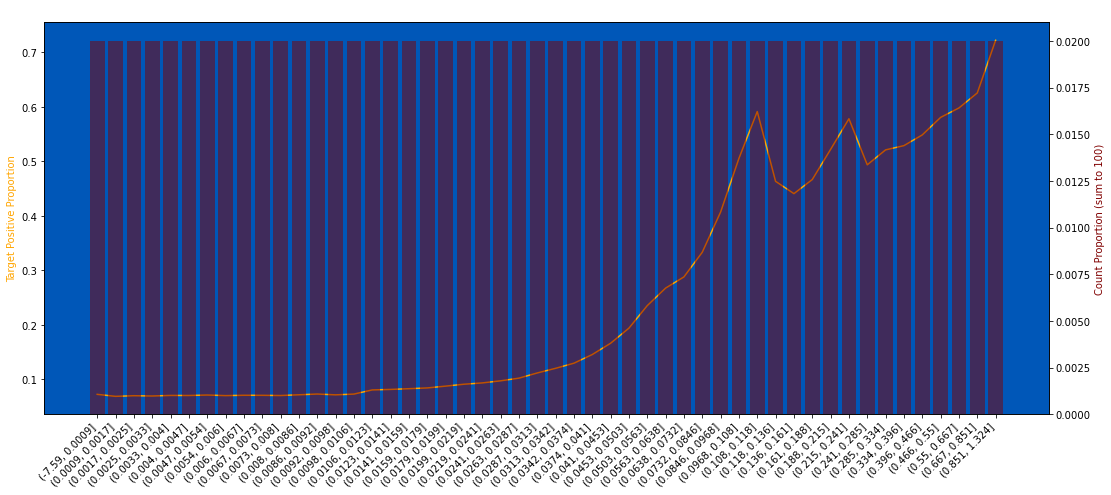

In [23]:
plot_target_check(train, "B_1", q=50, use_raw_bin=True)

In [24]:
%%time
df_list = round_dfs(df_list, col="B_1", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 460 ms, sys: 3.89 s, total: 4.35 s
Wall time: 12.7 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


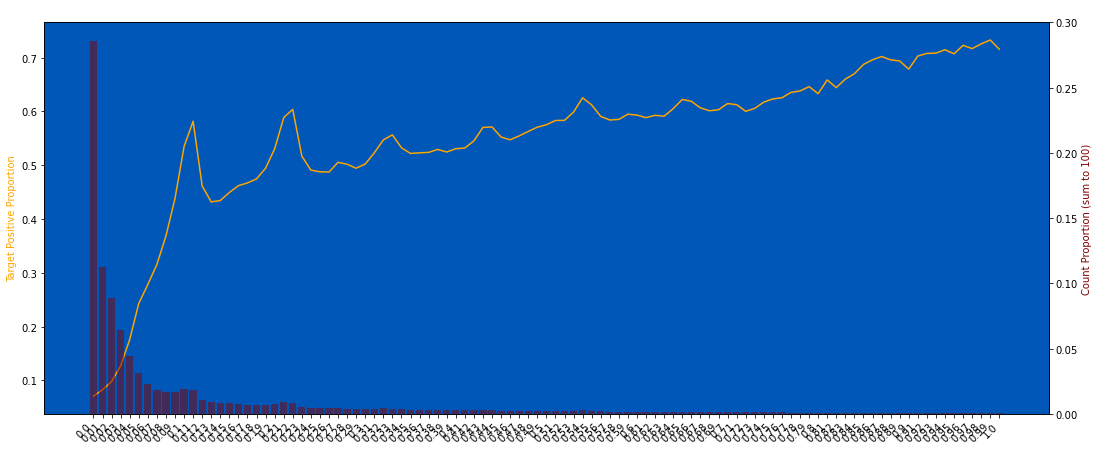

In [25]:
plot_target_check(train, "B_1", q=100, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

**ToDo:**
- Need to investigate why there is spike (with pattern), on 0.11, 0.22, 0.33, 0.44...?

Bottom 1% and Top 1% are dropped from this chart


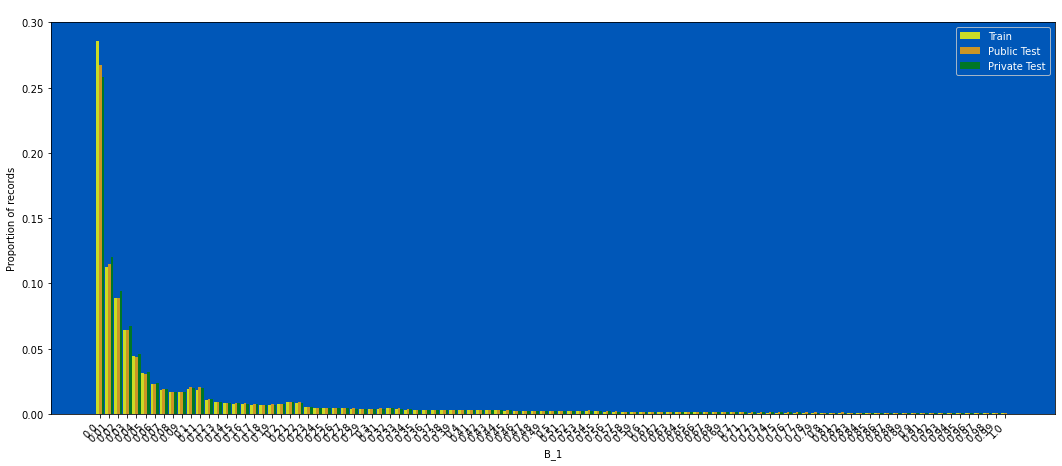

In [35]:
plot_train_test_distribution(df_list, "B_1", nunique_thr=8000)

### B_2

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


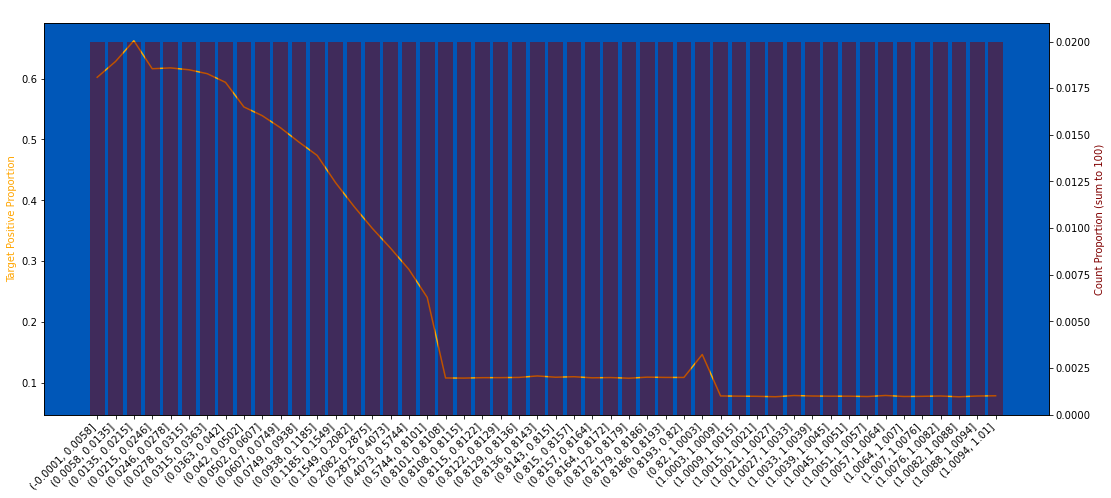

In [36]:
plot_target_check(train, "B_2", q=50, use_raw_bin=True)

In [37]:
%%time
df_list = round_dfs(df_list, col="B_2", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 423 ms, sys: 3.36 s, total: 3.78 s
Wall time: 10.1 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


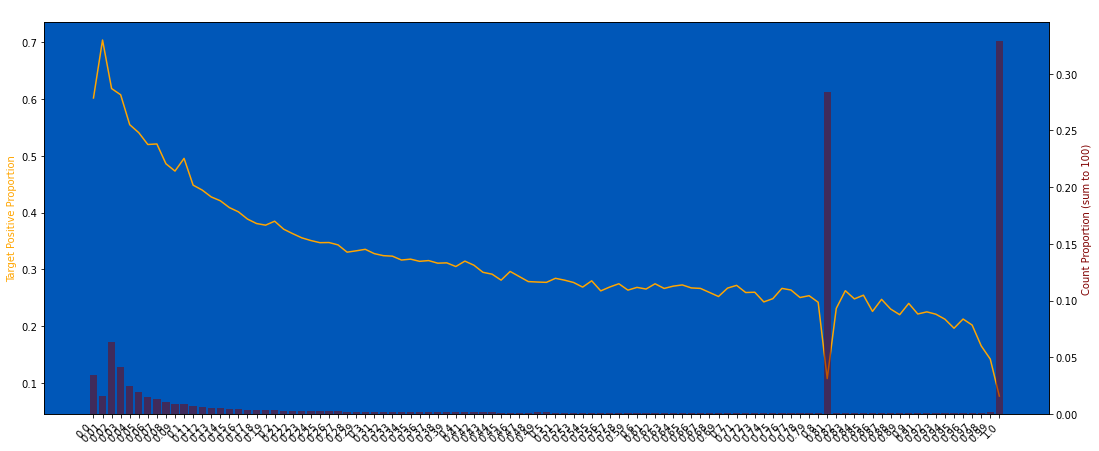

In [38]:
plot_target_check(train, "B_2", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

**ToDo:**
- Need to investigate why there are throughs (with pattern), on 0.81 and 1.0
  - They take about 60% of the observation, while dragging the whole trend down to about 1x %, which is significant lower than global average (25%)

Bottom 1% and Top 1% are dropped from this chart


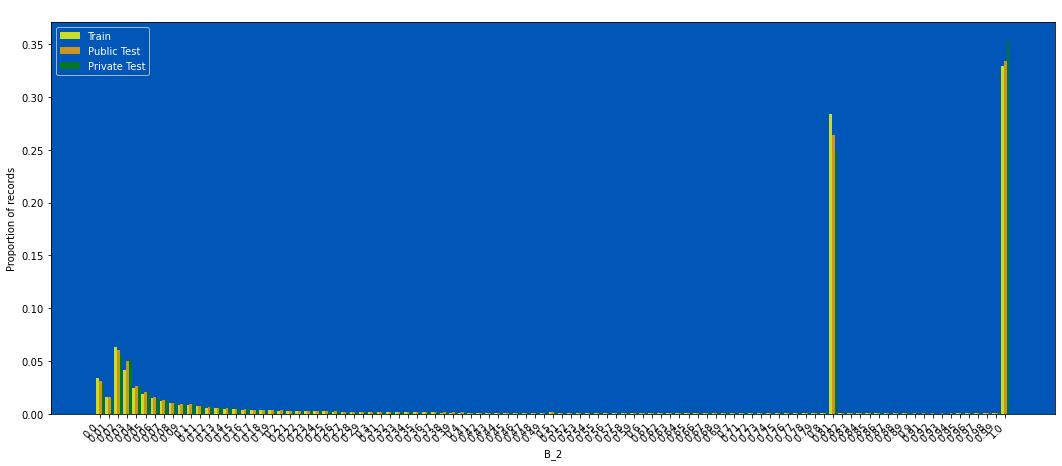

In [39]:
plot_train_test_distribution(df_list, "B_2", nunique_thr=8000)

### B_3

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


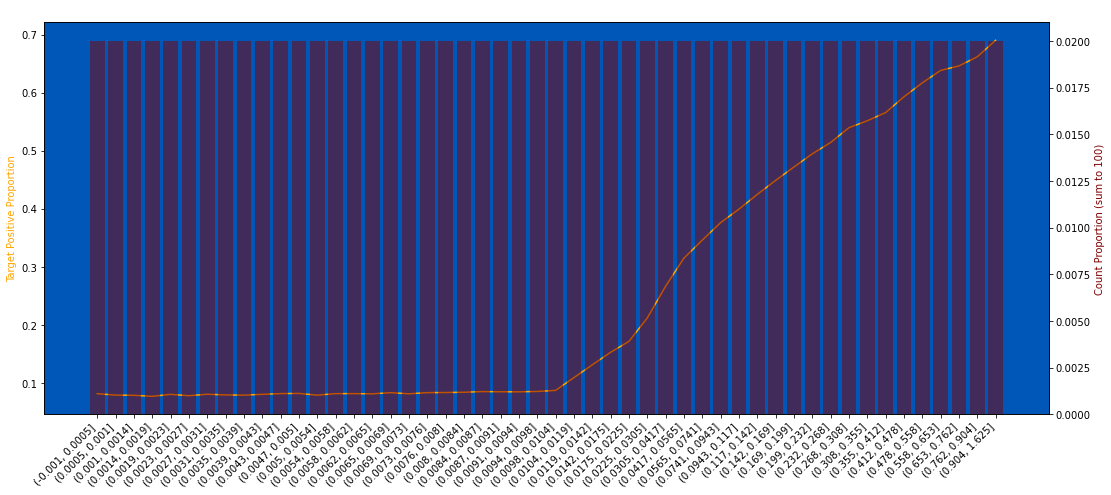

In [40]:
plot_target_check(train, "B_3", q=50, use_raw_bin=True)

In [41]:
%%time
df_list = round_dfs(df_list, col="B_3", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 448 ms, sys: 3.44 s, total: 3.88 s
Wall time: 10.6 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


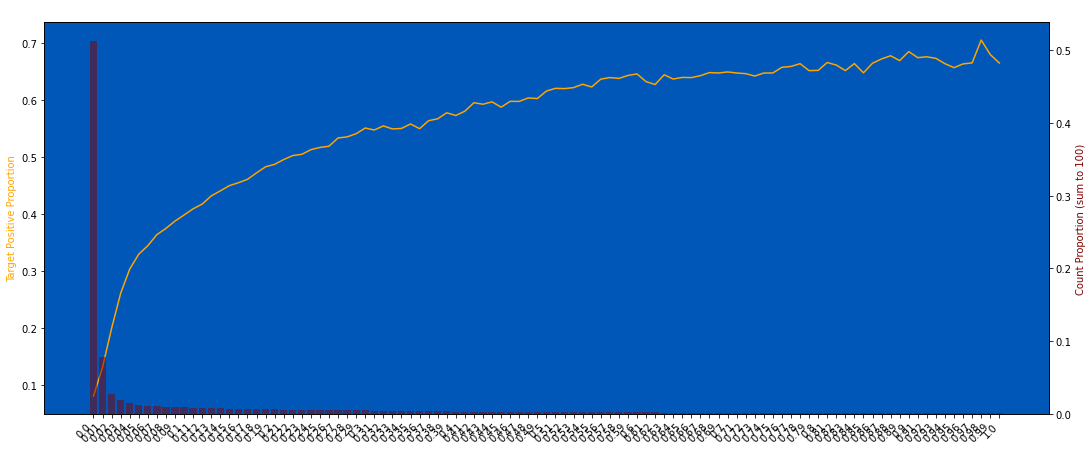

In [42]:
plot_target_check(train, "B_3", q=50, use_raw_bin=True, nunique_thr=8000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


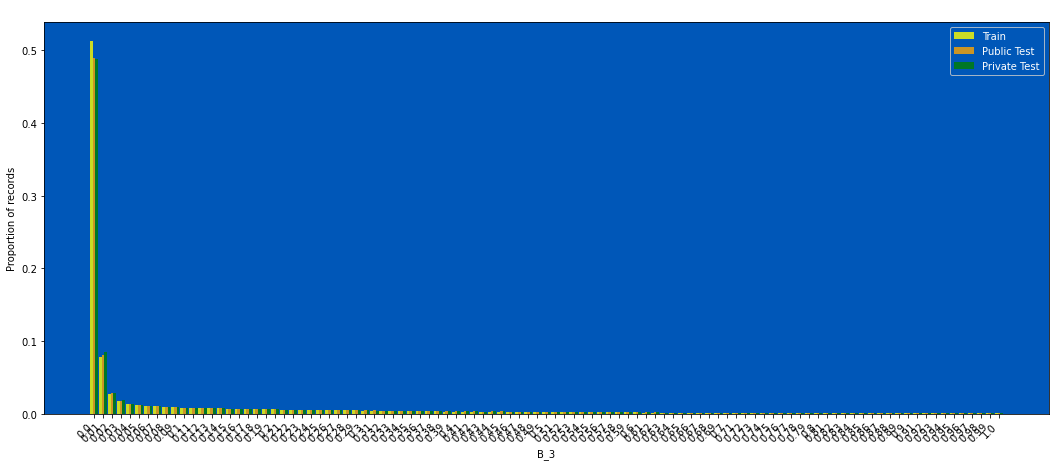

In [43]:
plot_train_test_distribution(df_list, "B_3", nunique_thr=8000)

### B_4

0 null count, 0.000 null proportion
nan of the targets have label = 1


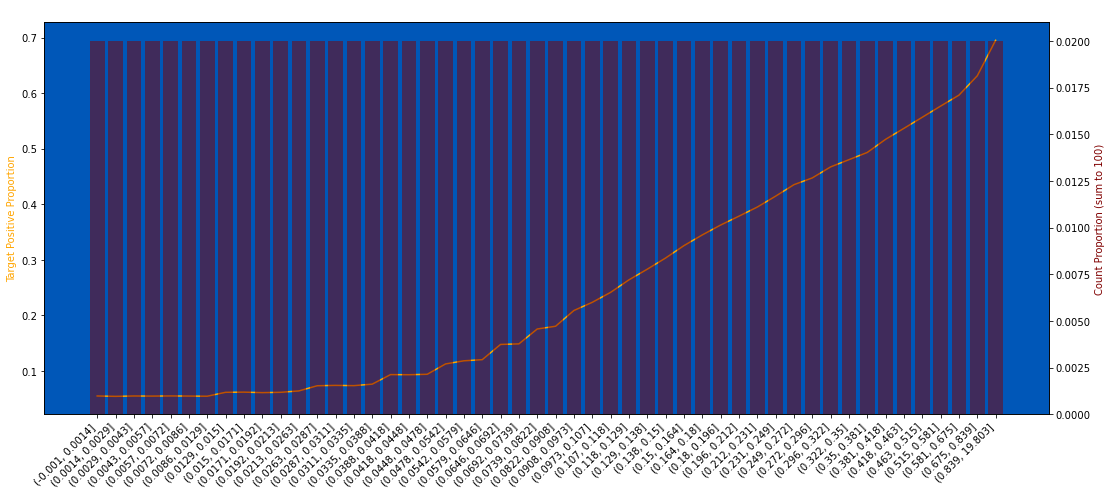

In [44]:
plot_target_check(train, "B_4", q=50, use_raw_bin=True, nunique_thr=1000)

In [47]:
%%time
df_list = round_dfs(df_list, col="B_4", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 452 ms, sys: 3.42 s, total: 3.87 s
Wall time: 12.6 s


Bottom 1% and Top 1% are dropped from this chart


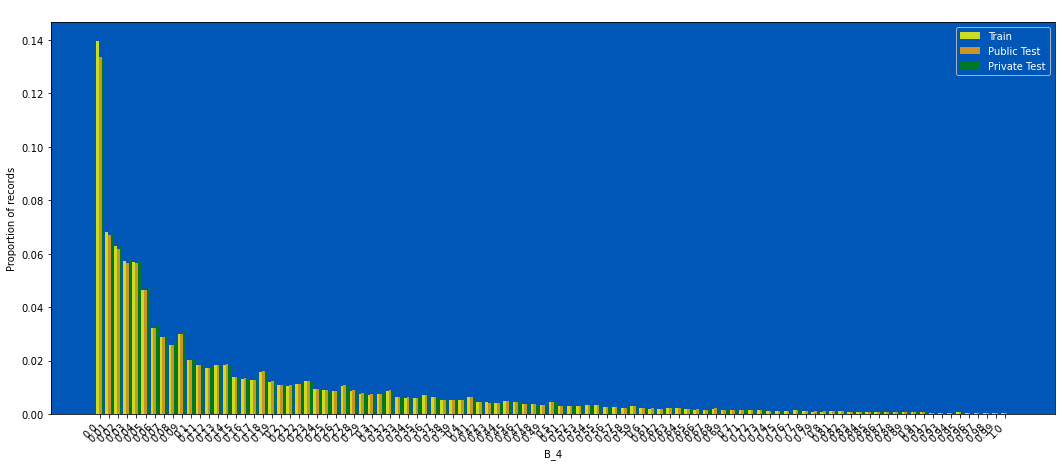

In [48]:
plot_train_test_distribution(df_list, "B_4", nunique_thr=8000)

### B_5

0 null count, 0.000 null proportion
nan of the targets have label = 1


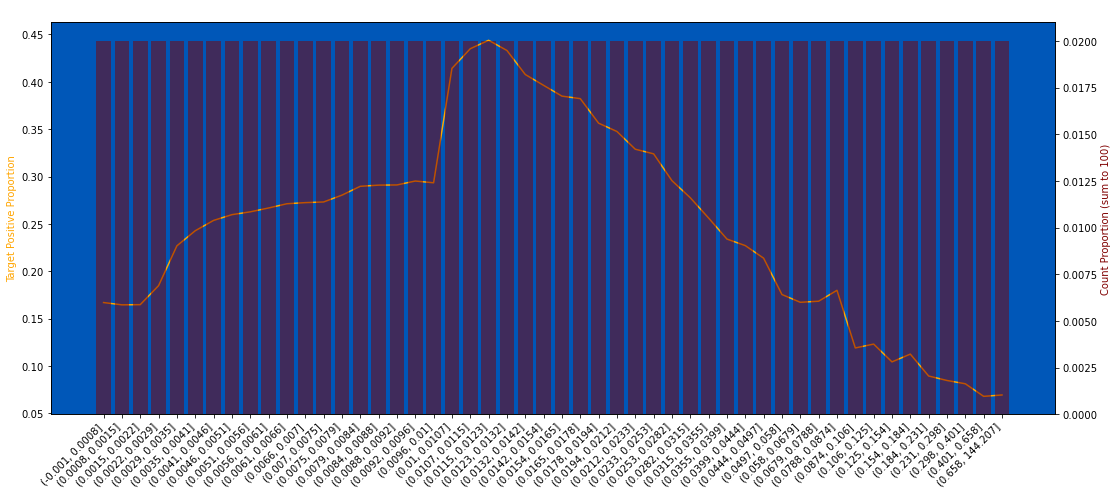

In [49]:
plot_target_check(train, "B_5", q=50, use_raw_bin=True)

In [50]:
%%time
df_list = round_dfs(df_list, col="B_5", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 551 ms, sys: 2.97 s, total: 3.52 s
Wall time: 11.4 s


In [61]:
df_list = fill_nans(df_list, col="B_5", tuple_of_values=(0), add_new_col=False)

2108895 null count, 0.381 null proportion
0.2503 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


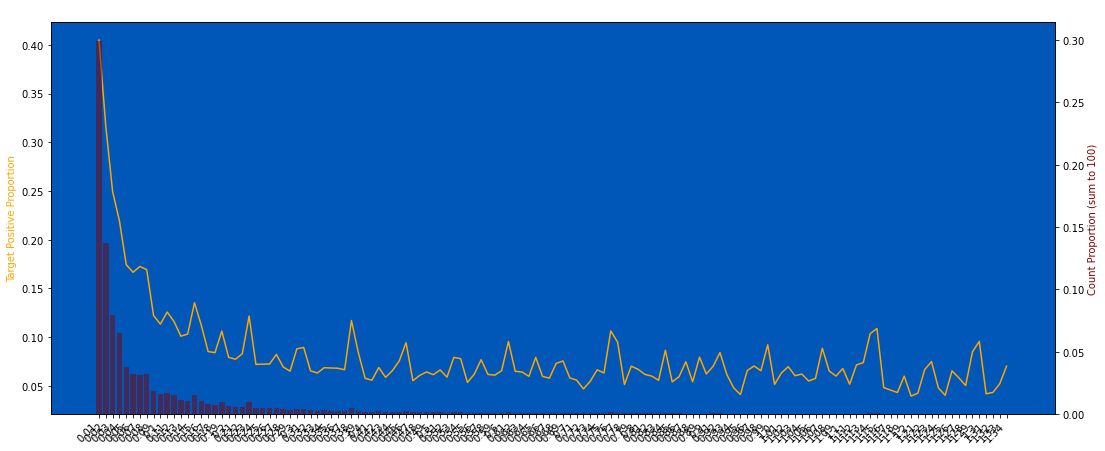

In [62]:
plot_target_check(train, "B_5", q=50, use_raw_bin=True, nunique_thr=8000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


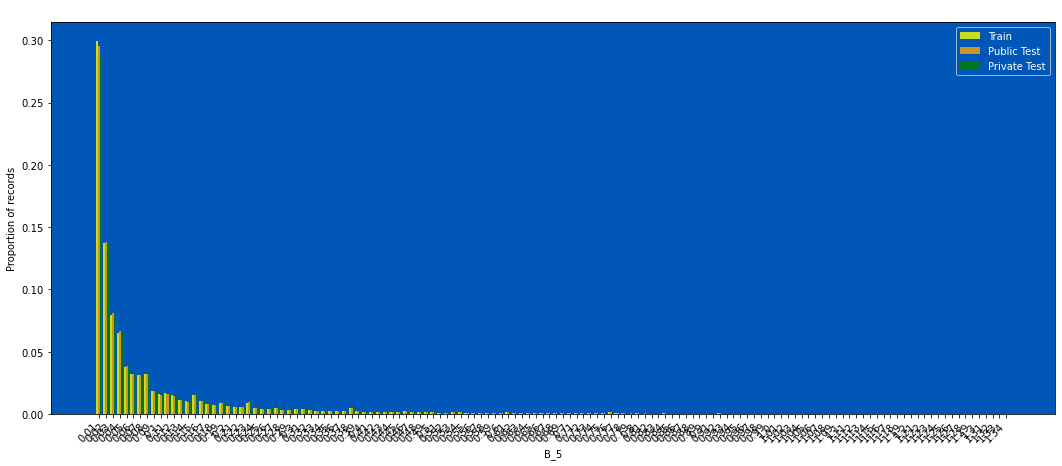

In [63]:
plot_train_test_distribution(df_list, "B_5", nunique_thr=8000)

### B_6

233 null count, 0.000 null proportion
0.2532 of the targets have label = 1


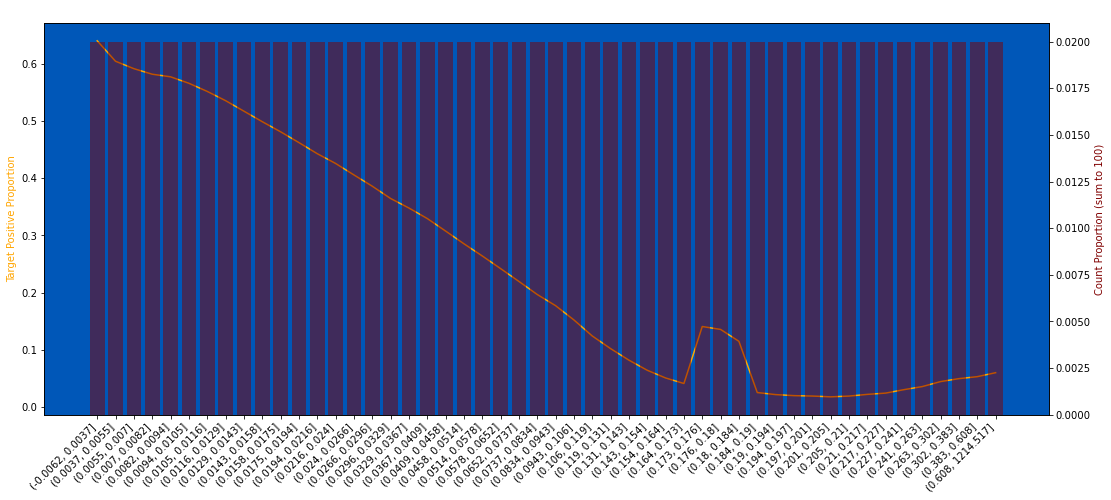

In [64]:
plot_target_check(train, "B_6", q=50, use_raw_bin=True)

In [65]:
%%time
df_list = round_dfs(df_list, col="B_6", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 340 ms, sys: 1.47 s, total: 1.81 s
Wall time: 2.85 s


233 null count, 0.000 null proportion
0.2532 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


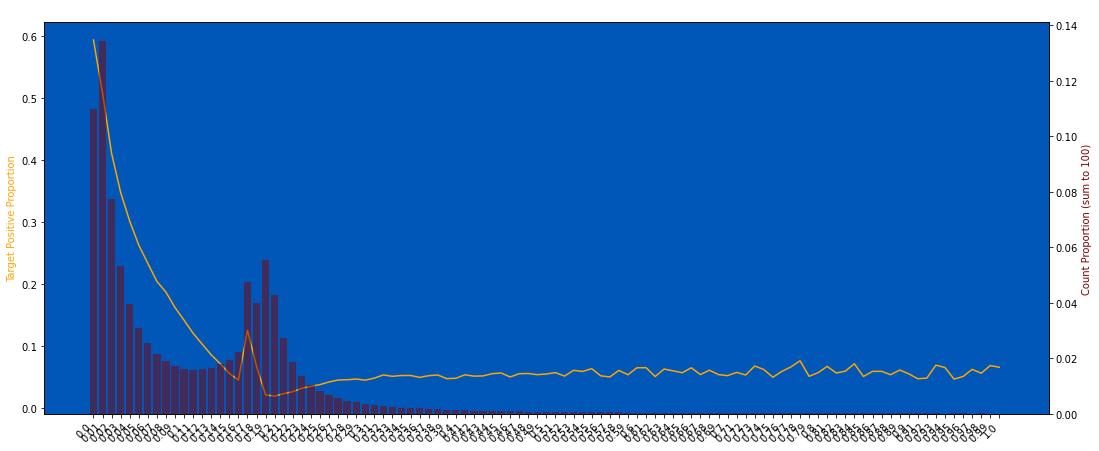

In [73]:
plot_target_check(train, "B_6", q=50, use_raw_bin=True, nunique_thr=7200, strfy_x=True)

**ToDo:**
- Need to investigate why there is a spike (which doesn't follow the trend), on 0.18 & 0.19
- Also, this variable has multi-peaks, would that be the root cause

Bottom 1% and Top 1% are dropped from this chart


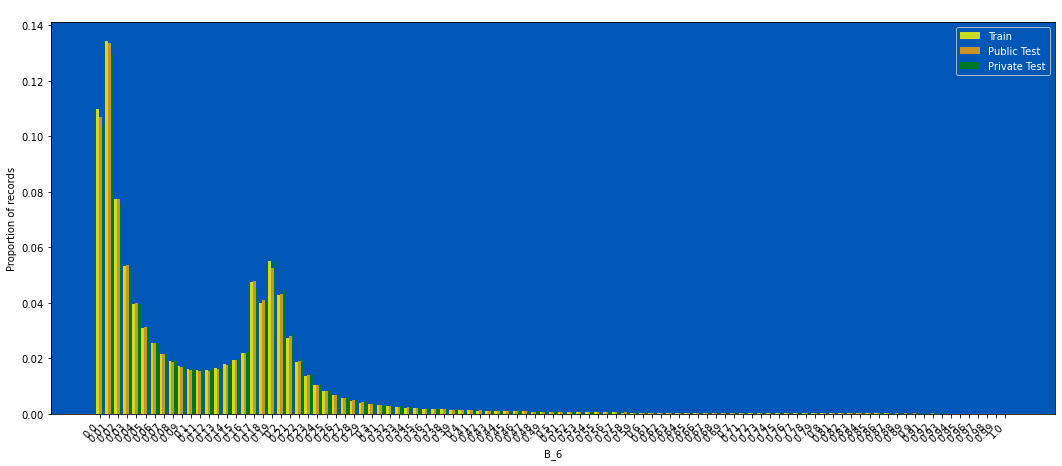

In [74]:
plot_train_test_distribution(df_list, "B_6", nunique_thr=8000)

### B_7

0 null count, 0.000 null proportion
nan of the targets have label = 1


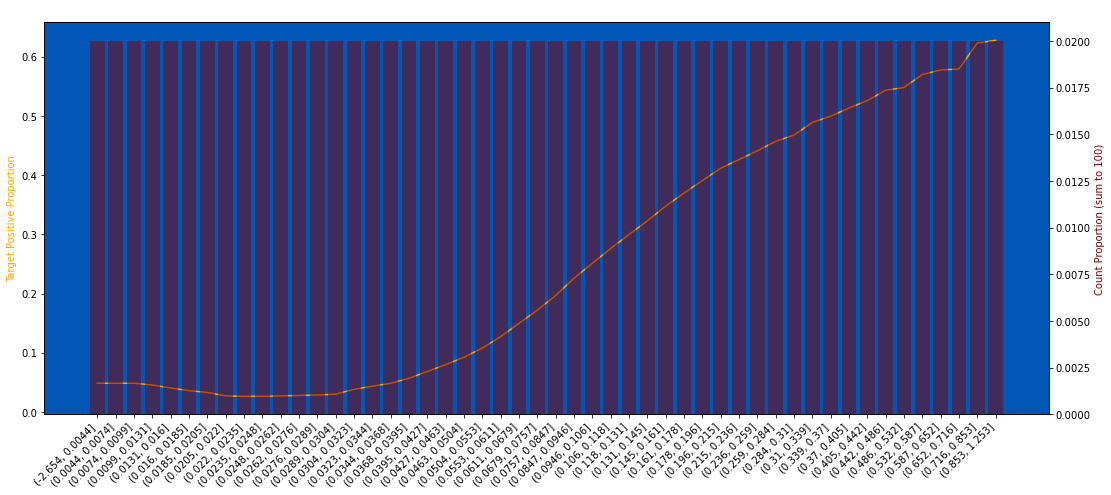

In [75]:
plot_target_check(train, "B_7", q=50, use_raw_bin=True)

In [76]:
%%time
df_list = round_dfs(df_list, col="B_7", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 332 ms, sys: 1.51 s, total: 1.84 s
Wall time: 3.2 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


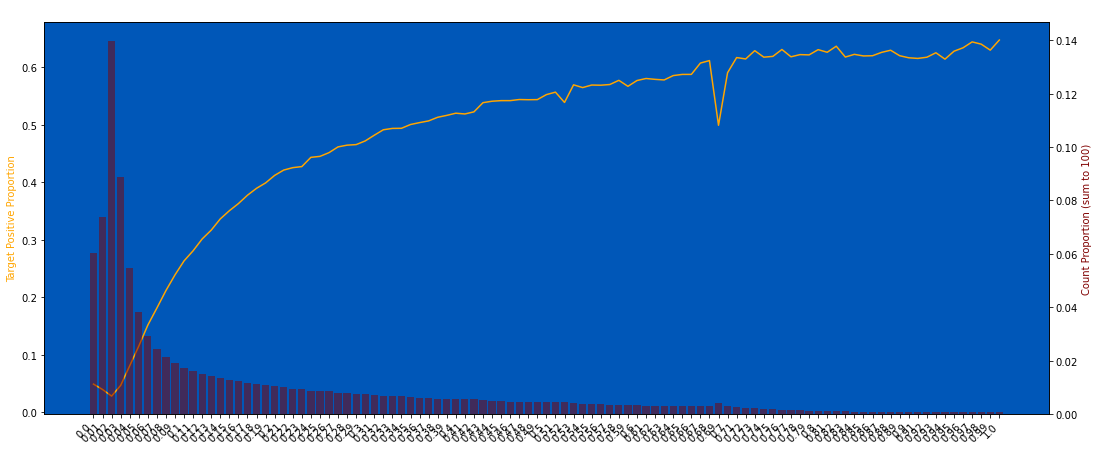

In [80]:
plot_target_check(train, "B_7", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


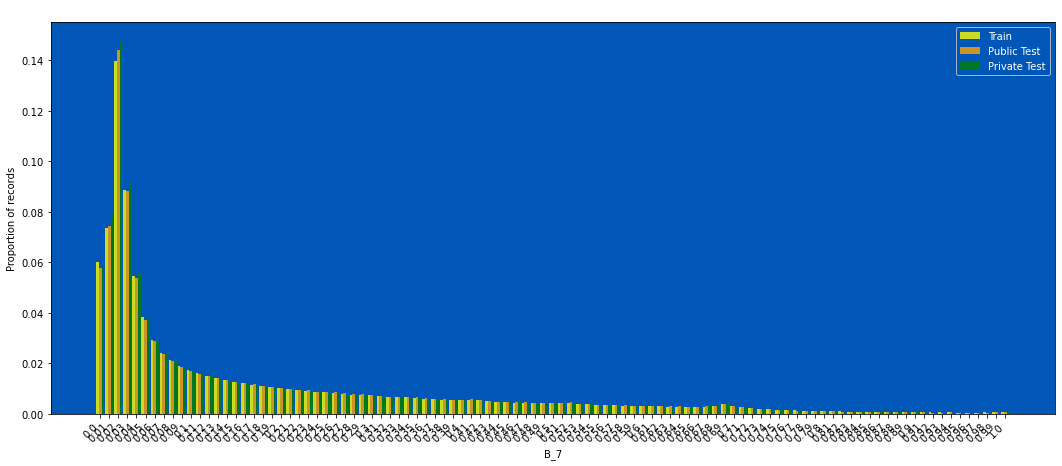

In [81]:
plot_train_test_distribution(df_list, "B_7", nunique_thr=8000)

### B_8

22268 null count, 0.004 null proportion
0.3044 of the targets have label = 1


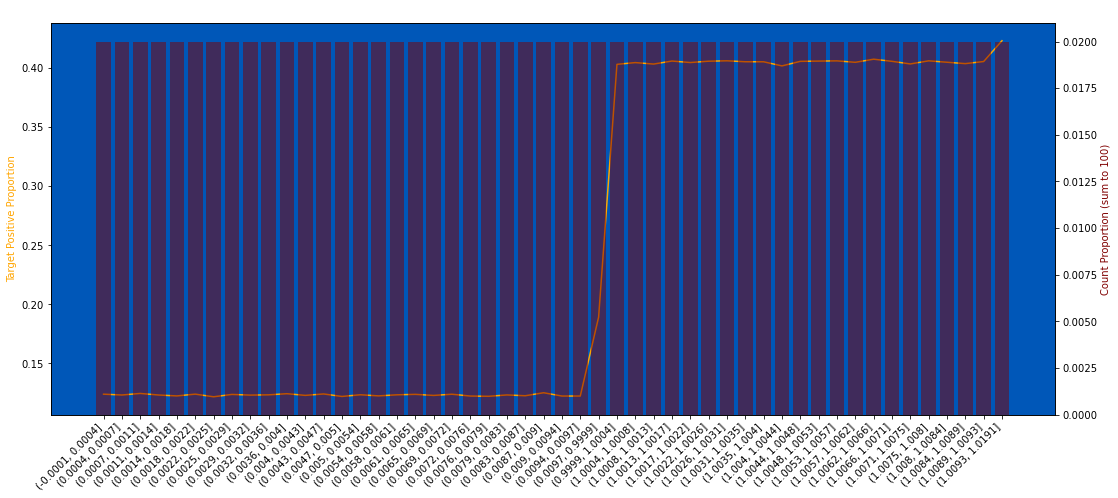

In [82]:
plot_target_check(train, "B_8", q=50, use_raw_bin=True)

In [83]:
%%time
df_list = round_dfs(df_list, col="B_8", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 370 ms, sys: 1.55 s, total: 1.92 s
Wall time: 3.5 s


In [86]:
train.groupby(["B_8"])["target"].mean()

B_8
0.0000   0.1233
0.9900   0.3732
1.0000   0.4057
1.0100   0.6547
Name: target, dtype: float64

22268 null count, 0.004 null proportion
0.3044 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


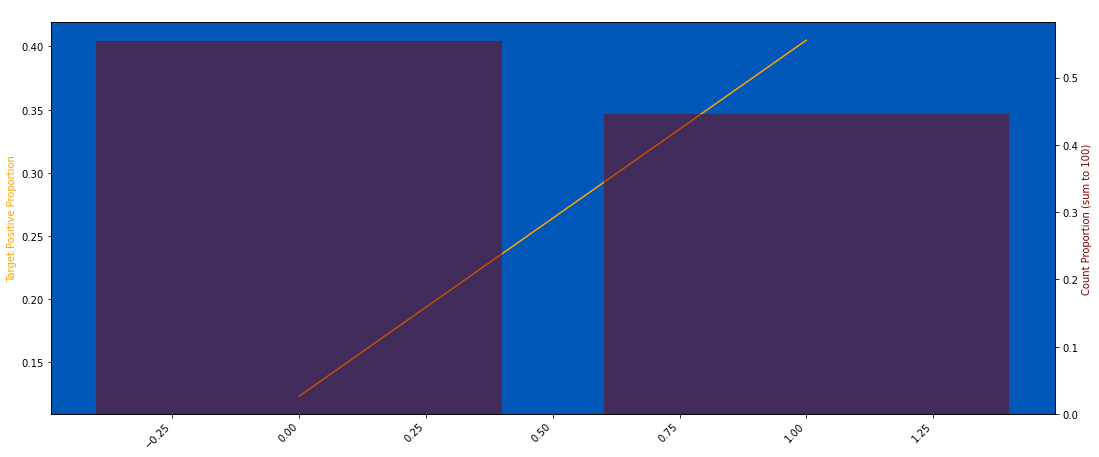

In [41]:
plot_target_check(train, "B_8", q=50, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


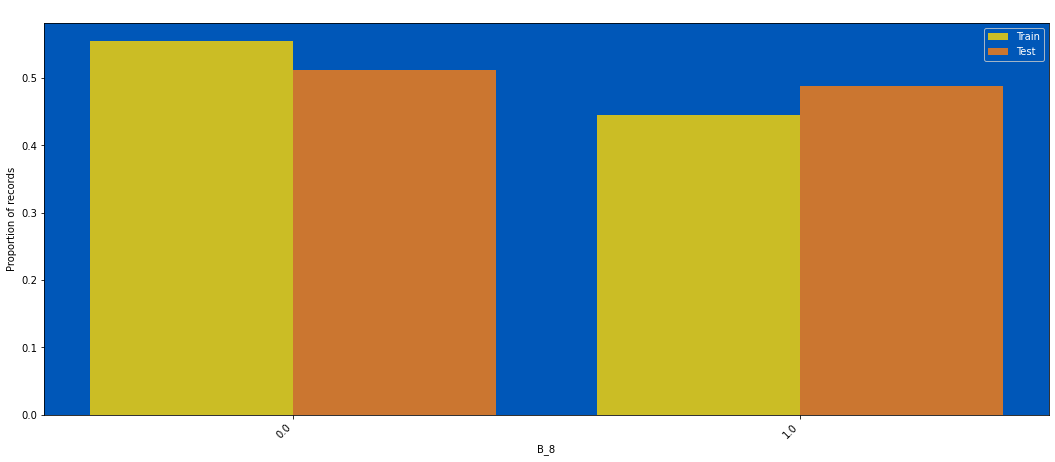

In [42]:
plot_train_test_distribution(train, test, "B_8", nunique_thr=8000)

### B_9

0 null count, 0.000 null proportion
nan of the targets have label = 1


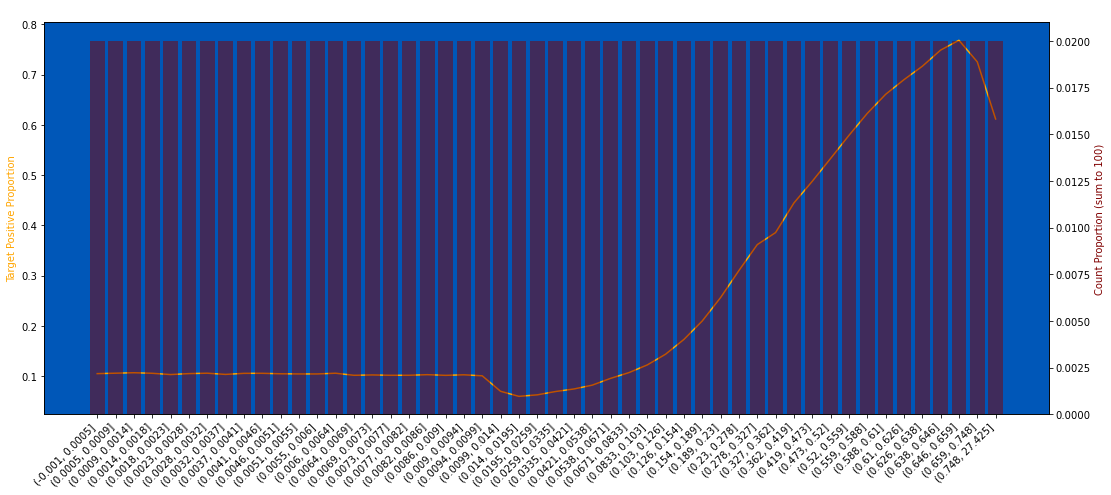

In [43]:
plot_target_check(train, "B_9", q=50, use_raw_bin=True)

In [44]:
train["B_9"] = train["B_9"].round(2)
test["B_9"] = test["B_9"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


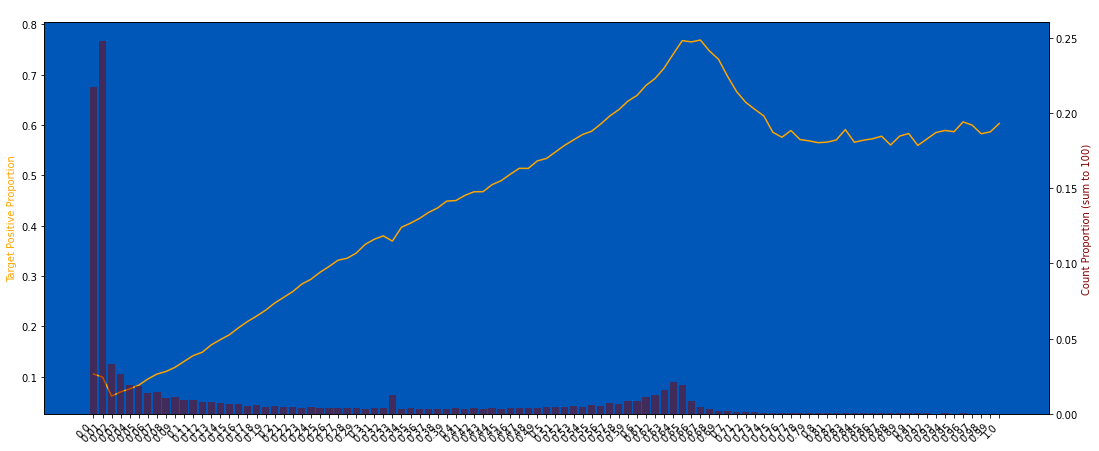

In [45]:
plot_target_check(train, "B_9", q=50, use_raw_bin=True, nunique_thr=3000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


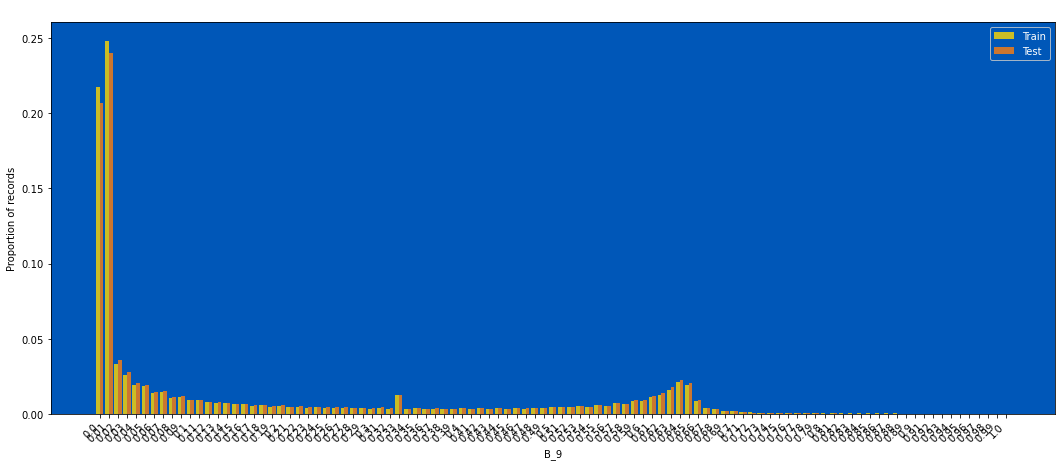

In [46]:
plot_train_test_distribution(train, test, "B_9", nunique_thr=8000)

### B_10

0 null count, 0.000 null proportion
nan of the targets have label = 1


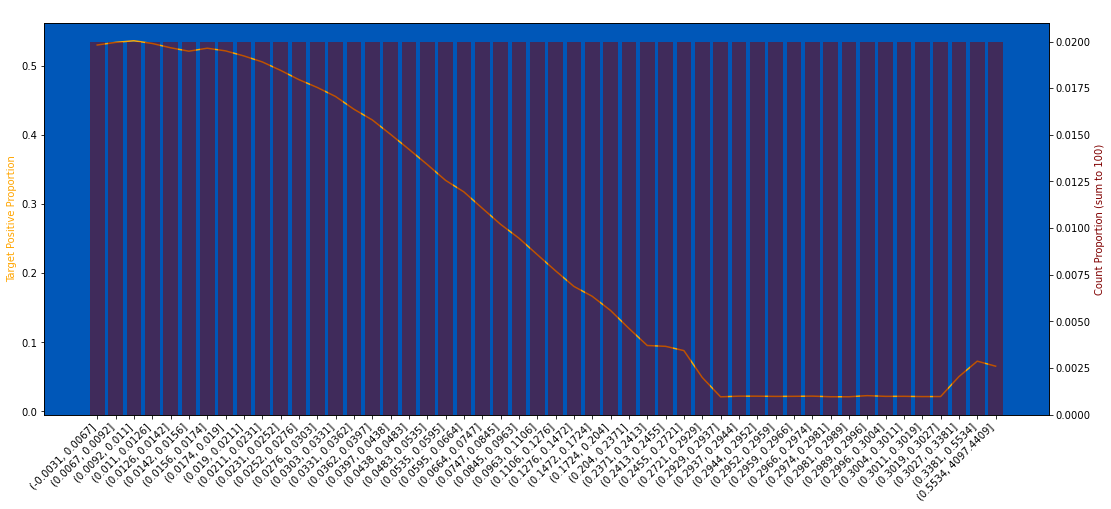

In [47]:
plot_target_check(train, "B_10", q=50, use_raw_bin=True)

In [48]:
train["B_10"] = train["B_10"].round(2)
test["B_10"] = test["B_10"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


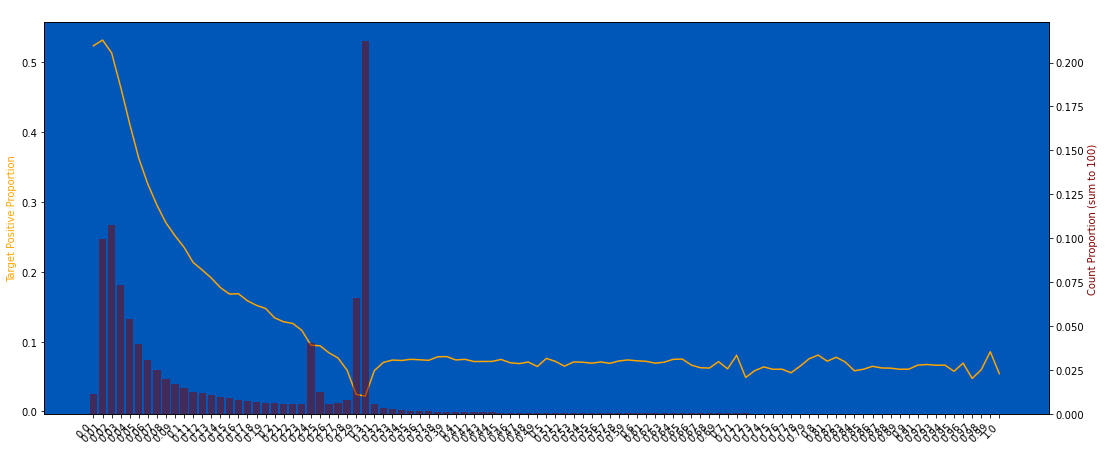

In [49]:
b10_summary = plot_target_check(train, "B_10", q=50, use_raw_bin=True, nunique_thr=7000, strfy_x=True, return_df=True)

Bottom 1% and Top 1% are dropped from this chart


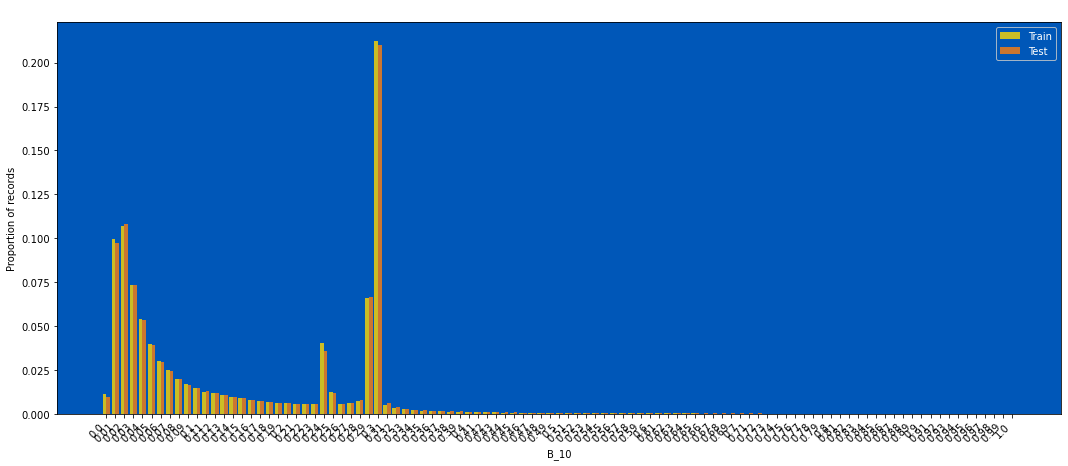

In [50]:
plot_train_test_distribution(train, test, "B_10", nunique_thr=8000)

### B_11

0 null count, 0.000 null proportion
nan of the targets have label = 1


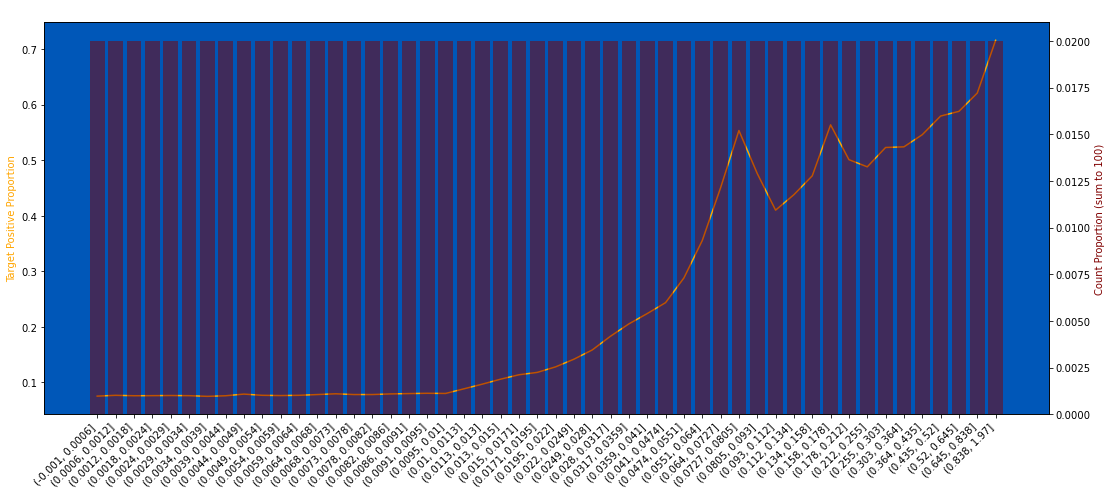

In [51]:
plot_target_check(train, "B_11", q=50, use_raw_bin=True)

In [52]:
train["B_11"] = train["B_11"].round(2)
test["B_11"] = test["B_11"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


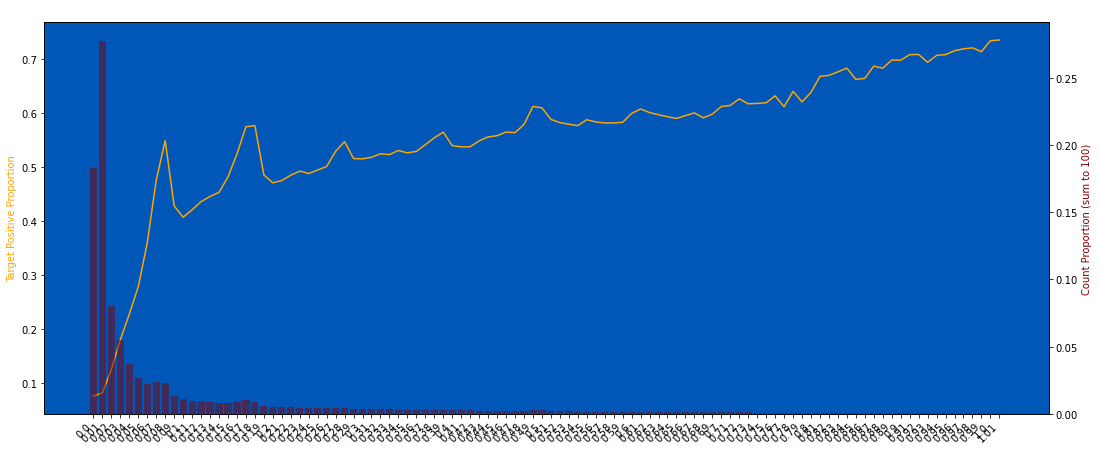

In [53]:
plot_target_check(train, "B_11", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


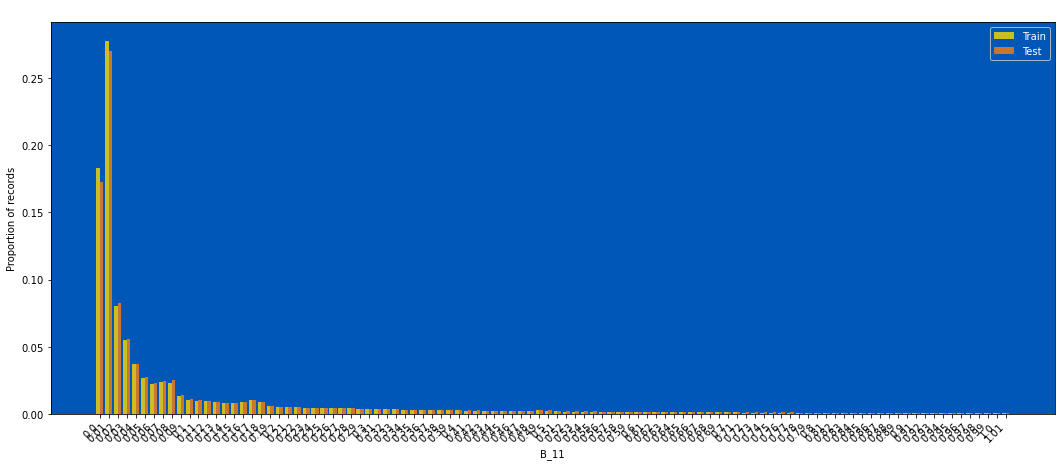

In [54]:
plot_train_test_distribution(train, test, "B_11", nunique_thr=8000)

### B_12

0 null count, 0.000 null proportion
nan of the targets have label = 1


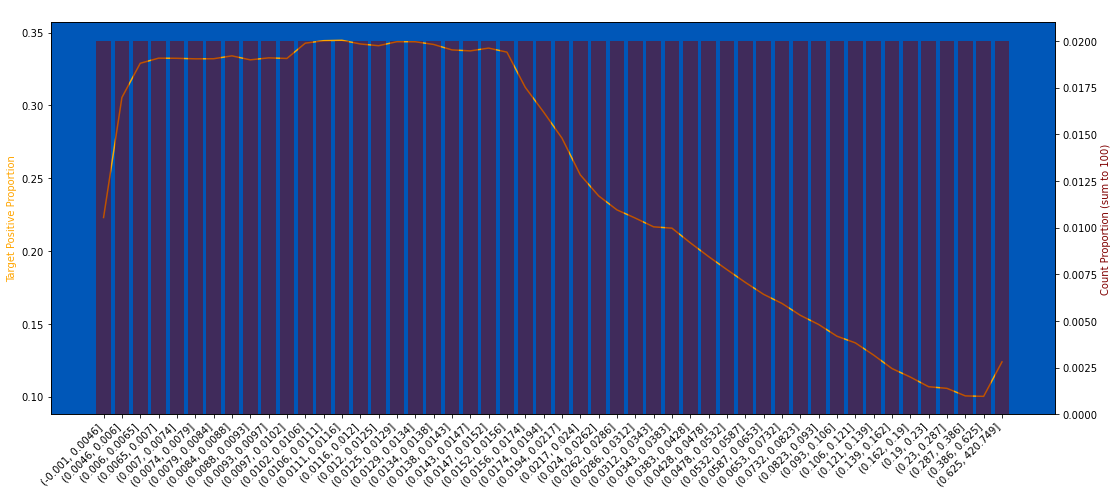

In [55]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True)

In [56]:
train["B_12"] = train["B_12"].round(2)
test["B_12"] = test["B_12"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


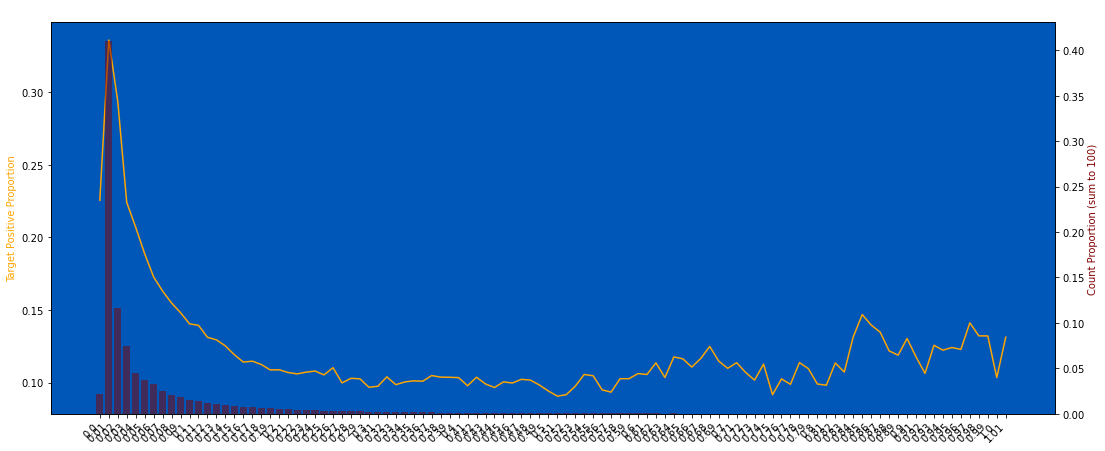

In [57]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [58]:
train.loc[train["B_12"] == 0, "B_12"] = np.nan
test.loc[test["B_12"] == 0, "B_12"] = np.nan

122422 null count, 0.022 null proportion
0.2256 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


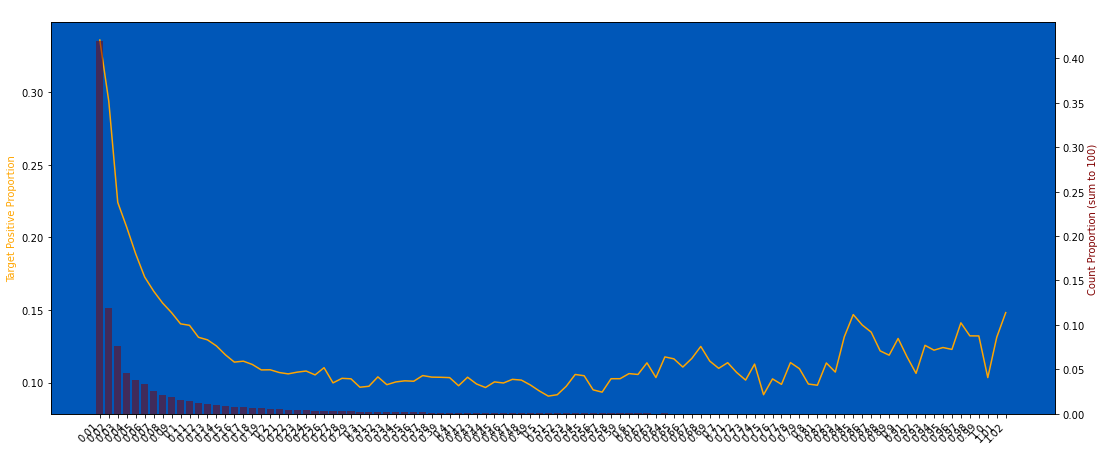

In [59]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


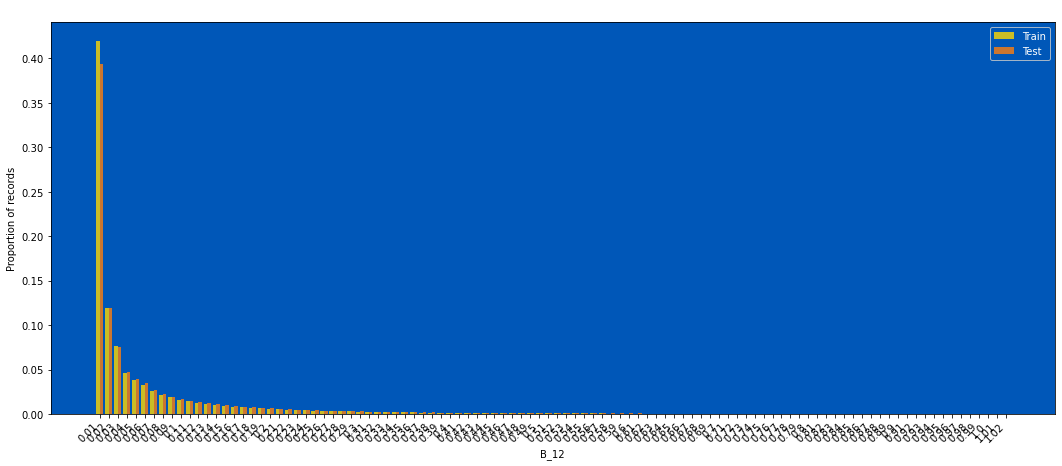

In [60]:
plot_train_test_distribution(train, test, "B_12", nunique_thr=8000)

### B_13

49519 null count, 0.009 null proportion
0.4906 of the targets have label = 1


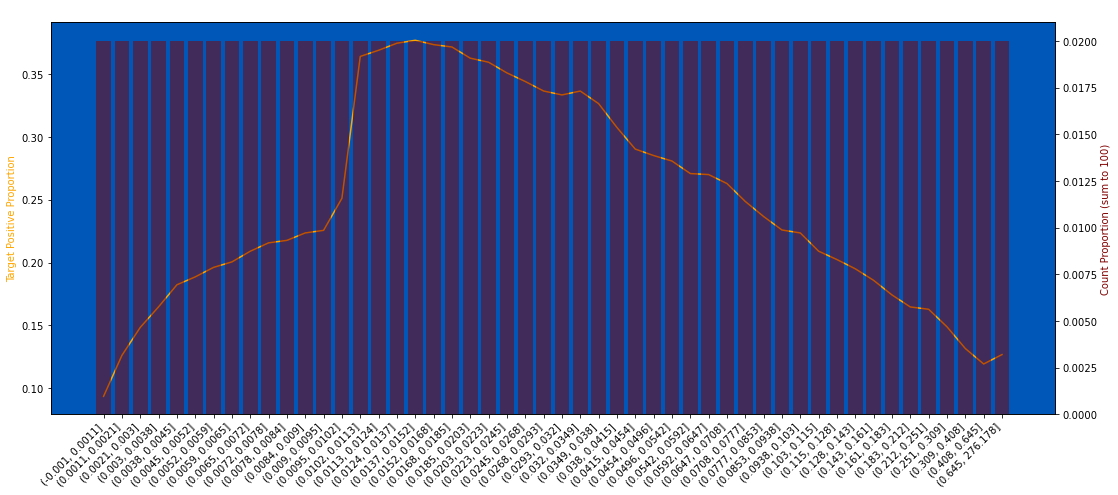

In [61]:
plot_target_check(train, "B_13", q=50, use_raw_bin=True)

In [62]:
train.loc[train["B_13"].between(0, 0.01), "B_13"] = np.nan
test.loc[test["B_13"].between(0, 0.01), "B_13"] = np.nan

In [63]:
train["B_13"] = train["B_13"].round(2)
test["B_13"] = test["B_13"].round(2)

1565474 null count, 0.283 null proportion
0.1962 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


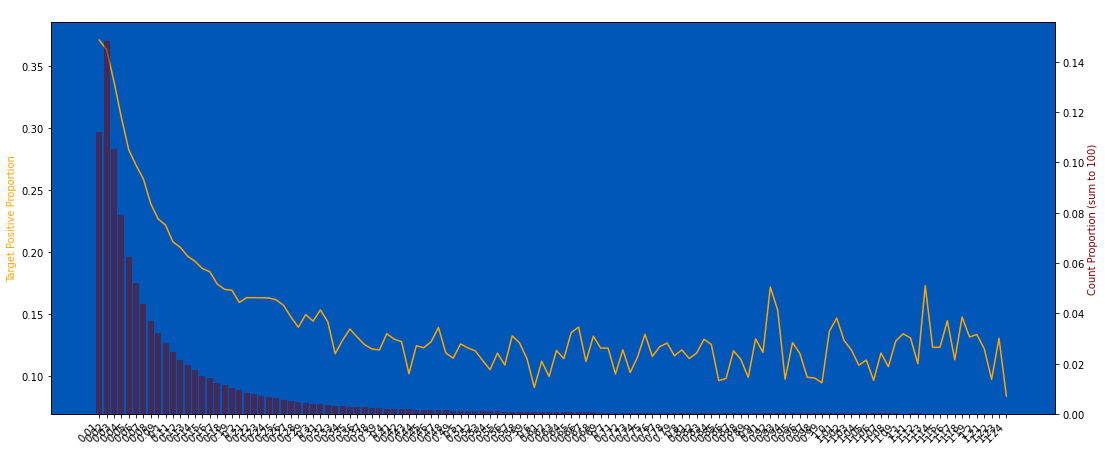

In [64]:
plot_target_check(train, "B_13", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


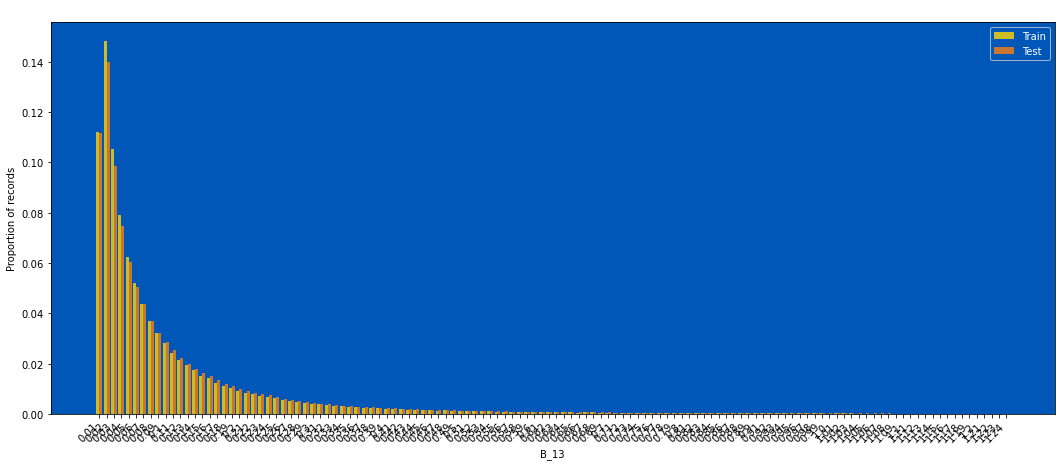

In [65]:
plot_train_test_distribution(train, test, "B_13", nunique_thr=8000)

### B_14

0 null count, 0.000 null proportion
nan of the targets have label = 1


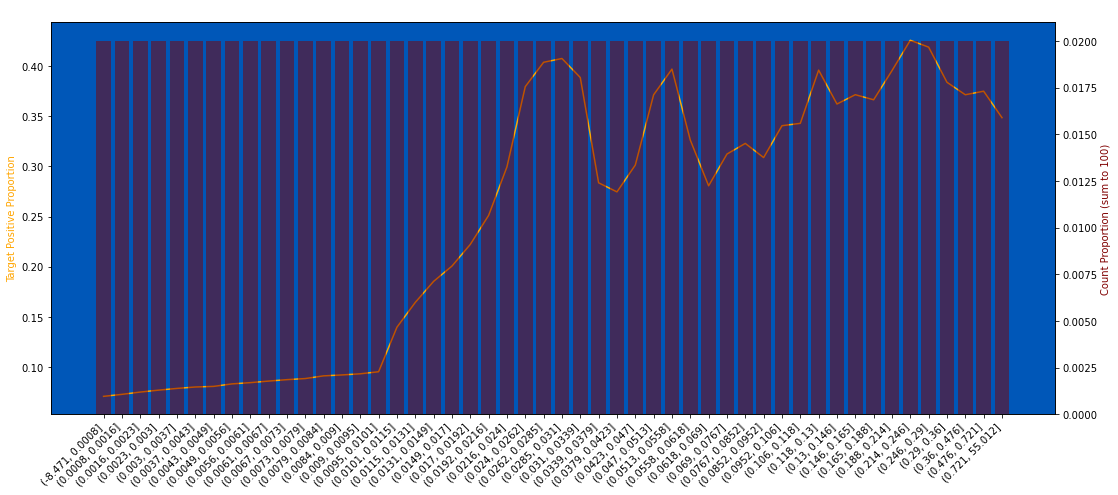

In [66]:
plot_target_check(train, "B_14", q=50, use_raw_bin=True)

In [67]:
train["B_14"] = train["B_14"].round(2)
test["B_14"] = test["B_14"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


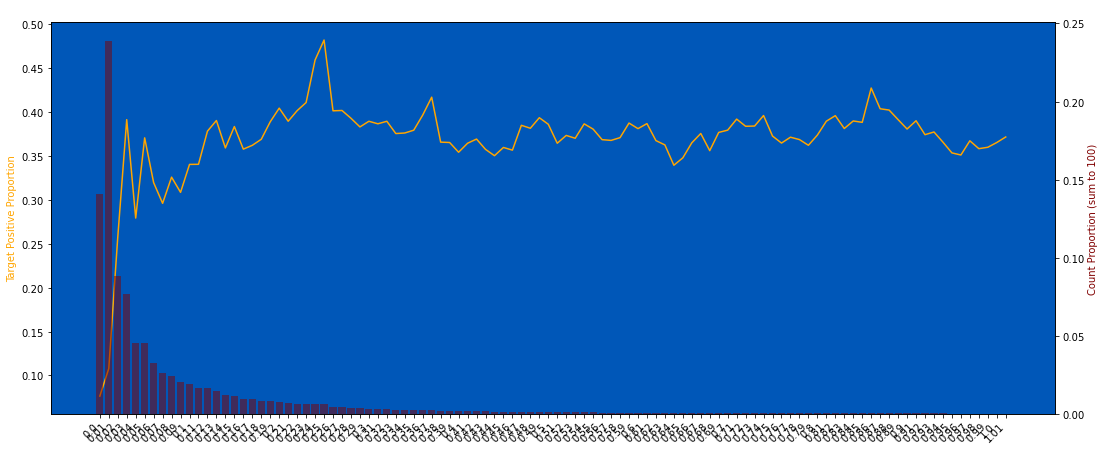

In [68]:
plot_target_check(train, "B_14", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


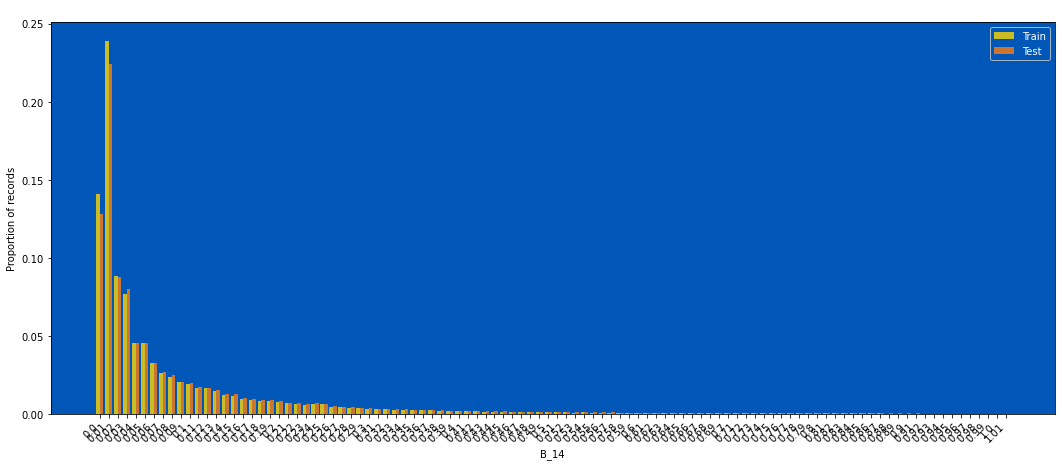

In [69]:
plot_train_test_distribution(train, test, "B_14", nunique_thr=8000)

### B_15

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


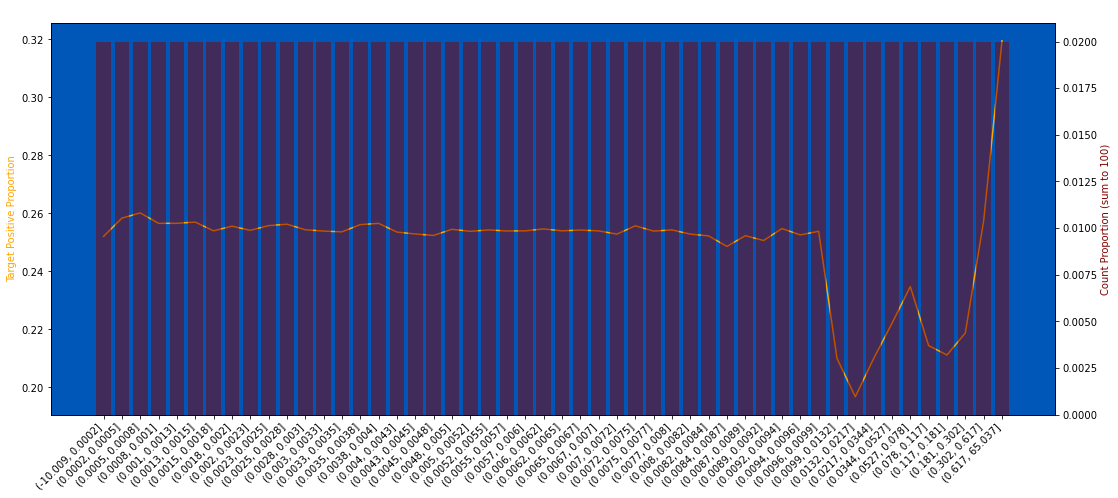

In [70]:
plot_target_check(train, "B_15", q=50, use_raw_bin=True)

In [71]:
train["B_15"] = train["B_15"].round(2)
test["B_15"] = test["B_15"].round(2)

In [72]:
train.loc[train["B_15"].between(0, 0.0101), "B_15"] = 0.01
test.loc[test["B_15"].between(0, 0.0101), "B_15"] = 0.01

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


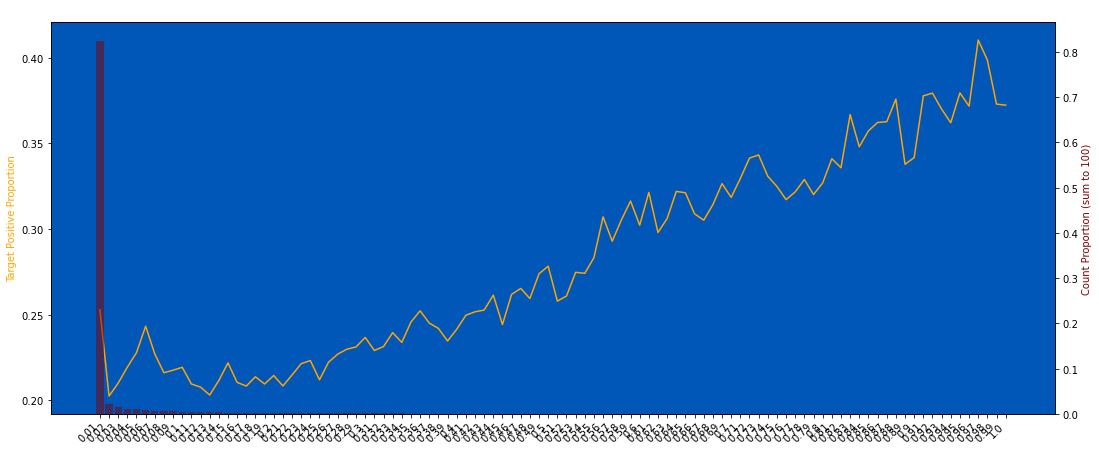

In [73]:
plot_target_check(train, "B_15", q=50, use_raw_bin=True, nunique_thr=3000, strfy_x=True)

### B_16

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


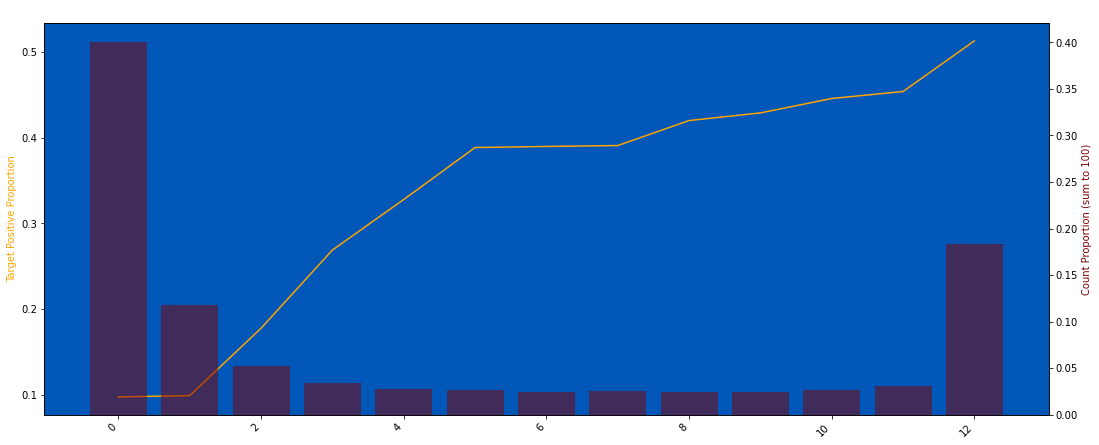

In [74]:
plot_target_check(train, "B_16", q=50, use_raw_bin=True)

### B_17

3137598 null count, 0.567 null proportion
0.1226 of the targets have label = 1


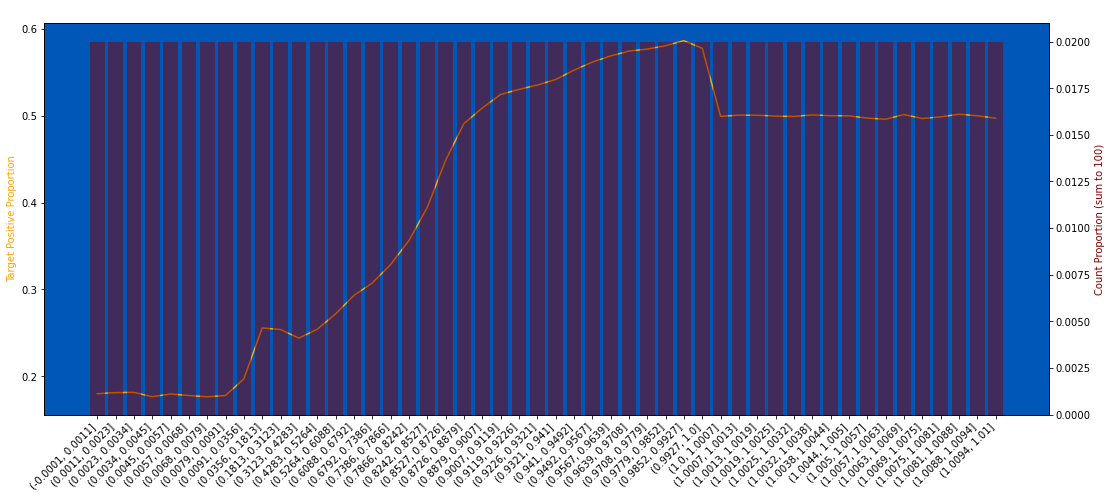

In [75]:
plot_target_check(train, "B_17", q=50, use_raw_bin=True)

In [76]:
train["B_17"] = train["B_17"].round(2)
test["B_17"] = test["B_17"].round(2)

In [77]:
train.loc[train["B_17"].between(-1, 0.01), "B_17"] = np.nan
test.loc[test["B_17"].between(-1, 0.01), "B_17"] = np.nan

In [78]:
train.loc[train["B_17"].between(1, 1.01), "B_17"] = np.nan
test.loc[test["B_17"].between(1, 1.01), "B_17"] = np.nan

4361833 null count, 0.789 null proportion
0.1979 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


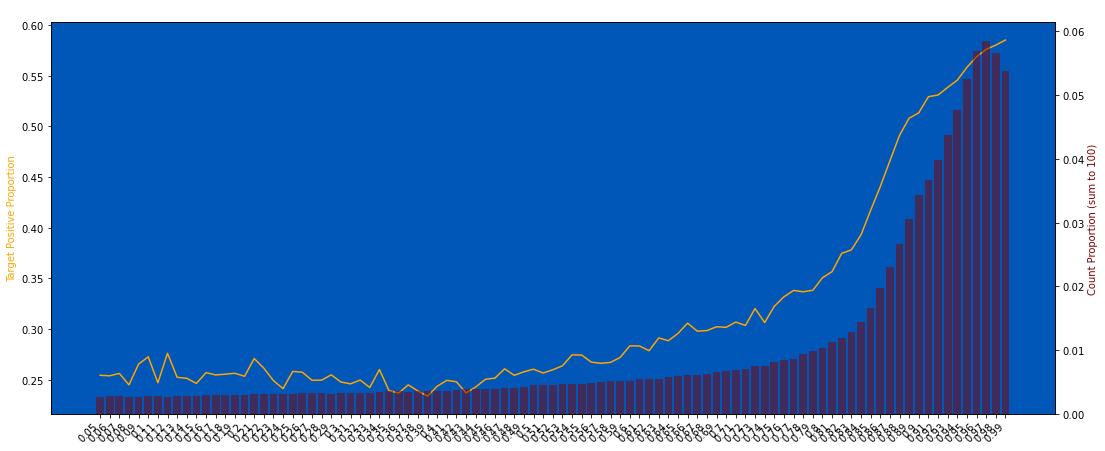

In [79]:
plot_target_check(train, "B_17", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

### B_18

0 null count, 0.000 null proportion
nan of the targets have label = 1


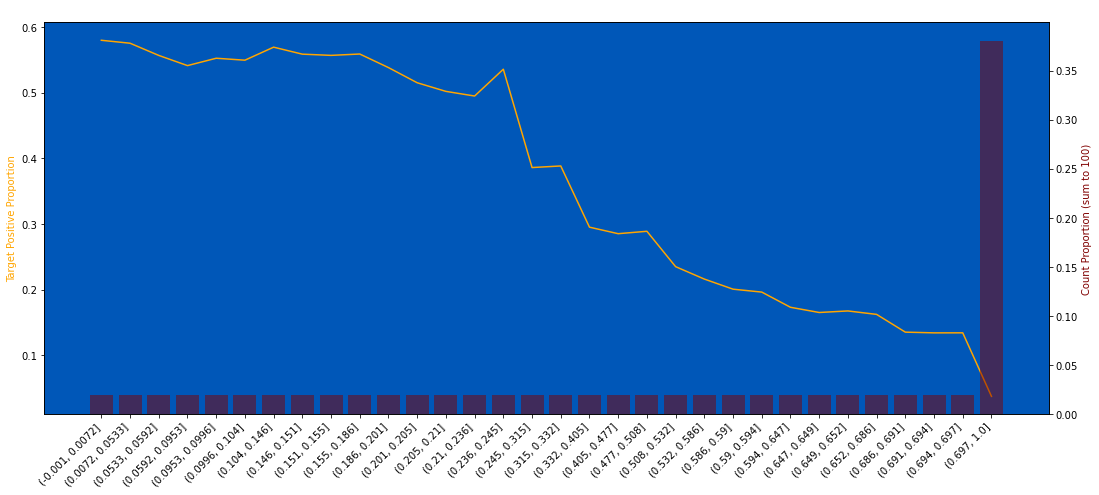

In [80]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True)

In [81]:
train["B_18"] = train["B_18"].round(2)
test["B_18"] = test["B_18"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


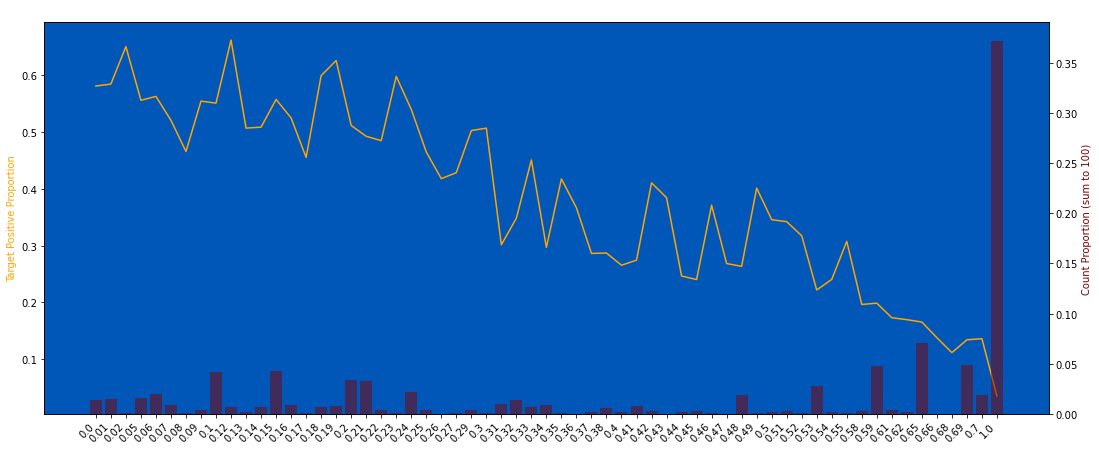

In [82]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

### B_19

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


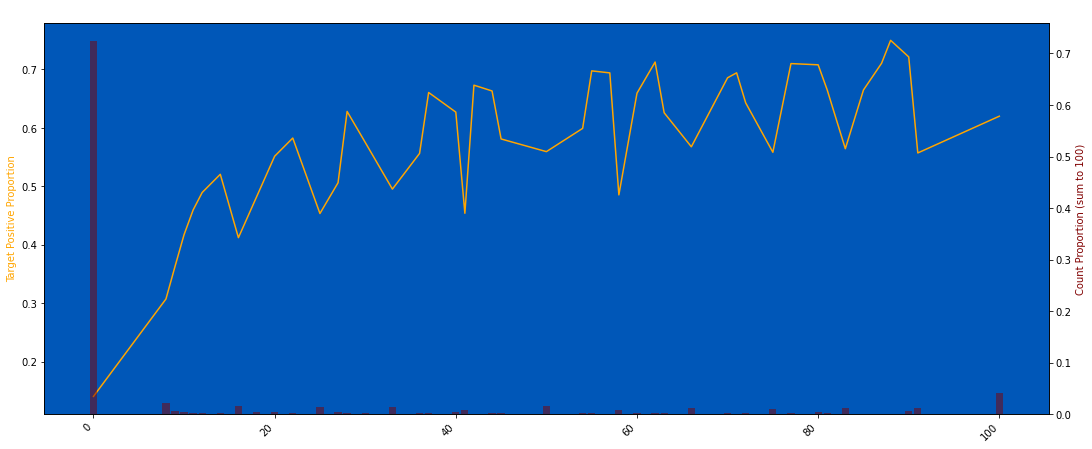

In [83]:
plot_target_check(train, "B_19", q=50, use_raw_bin=True)

### B_20

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


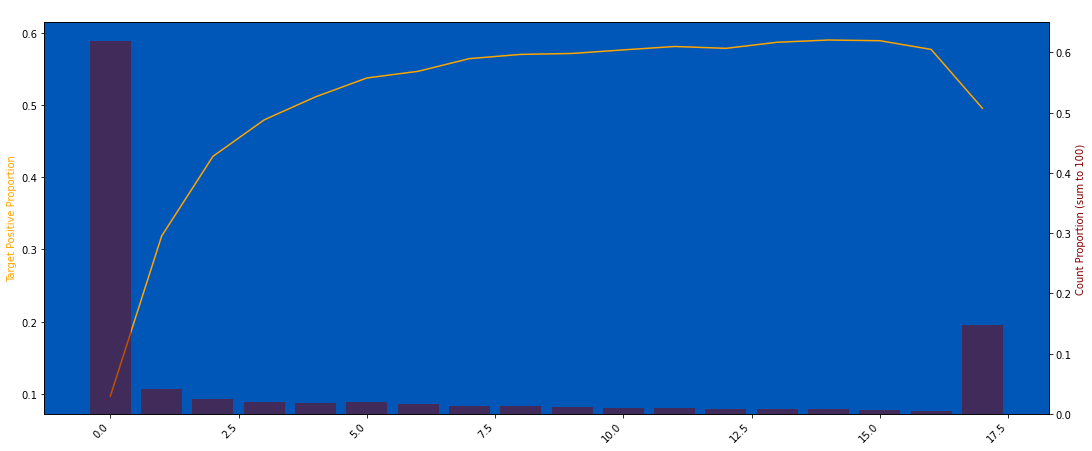

In [84]:
plot_target_check(train, "B_20", q=50, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


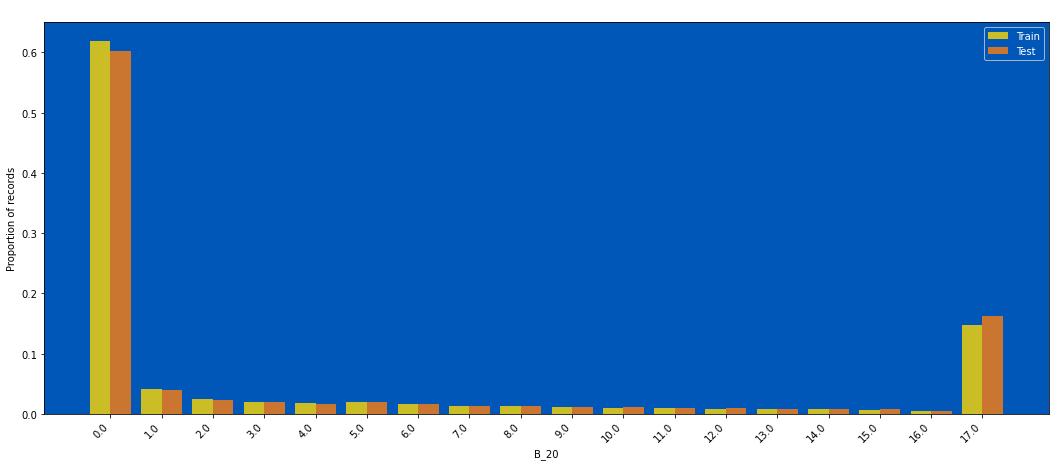

In [85]:
plot_train_test_distribution(train, test, "B_20", nunique_thr=8000)

### B_21

0 null count, 0.000 null proportion
nan of the targets have label = 1


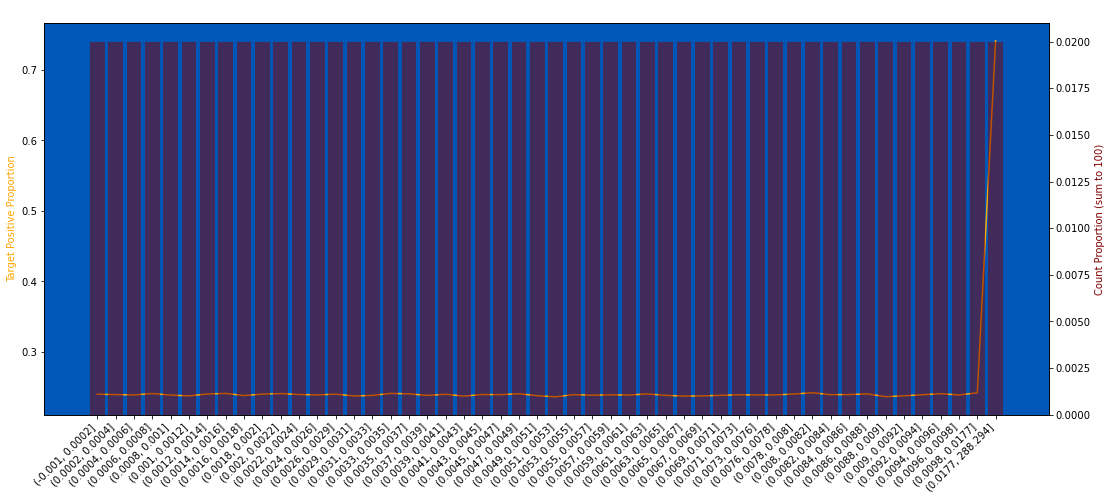

In [86]:
plot_target_check(train, "B_21", q=50, use_raw_bin=True)

In [87]:
train["B_21"] = train["B_21"].round(2)
test["B_21"] = test["B_21"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


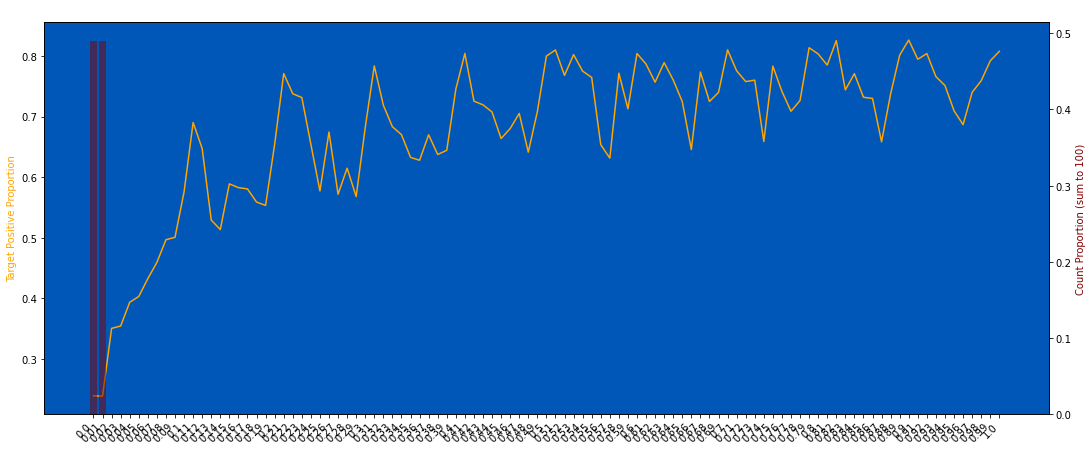

In [88]:
plot_target_check(train, "B_21", q=200, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

### B_22

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


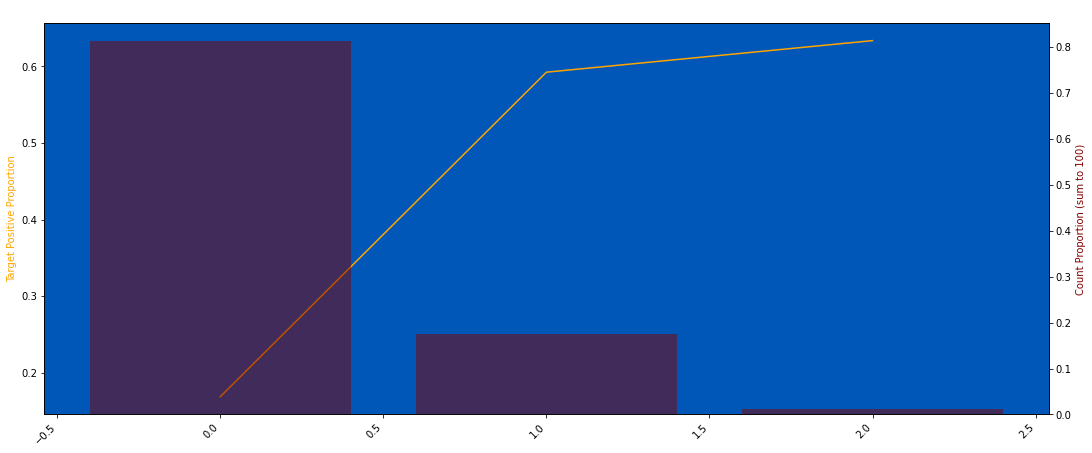

In [89]:
plot_target_check(train, "B_22", q=50, use_raw_bin=True, nunique_thr=7000)

### B_23

0 null count, 0.000 null proportion
nan of the targets have label = 1


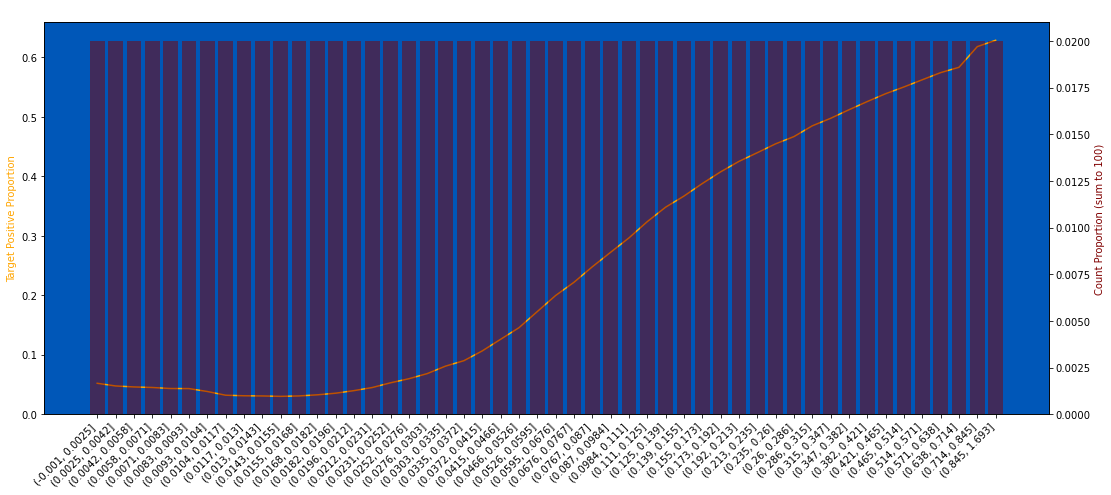

In [90]:
plot_target_check(train, "B_23", q=50, use_raw_bin=True)

In [91]:
train["B_23"] = train["B_23"].round(2)
test["B_23"] = test["B_23"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


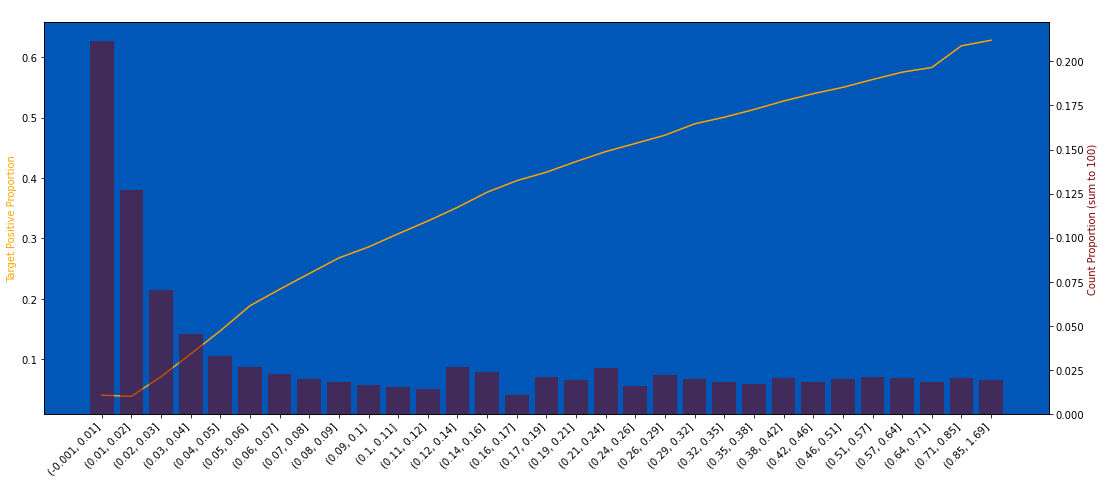

In [92]:
plot_target_check(train, "B_23", q=50, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


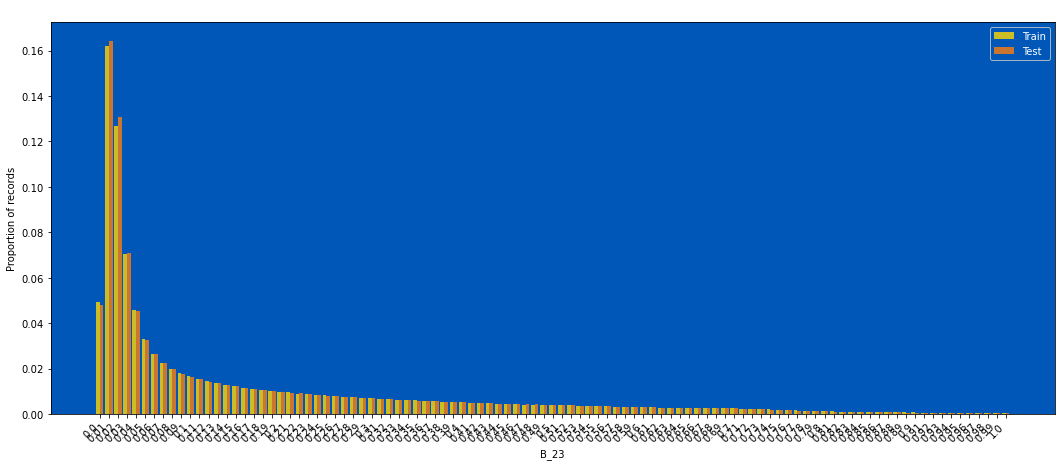

In [93]:
plot_train_test_distribution(train, test, "B_23", nunique_thr=8000)

### B_24

0 null count, 0.000 null proportion
nan of the targets have label = 1


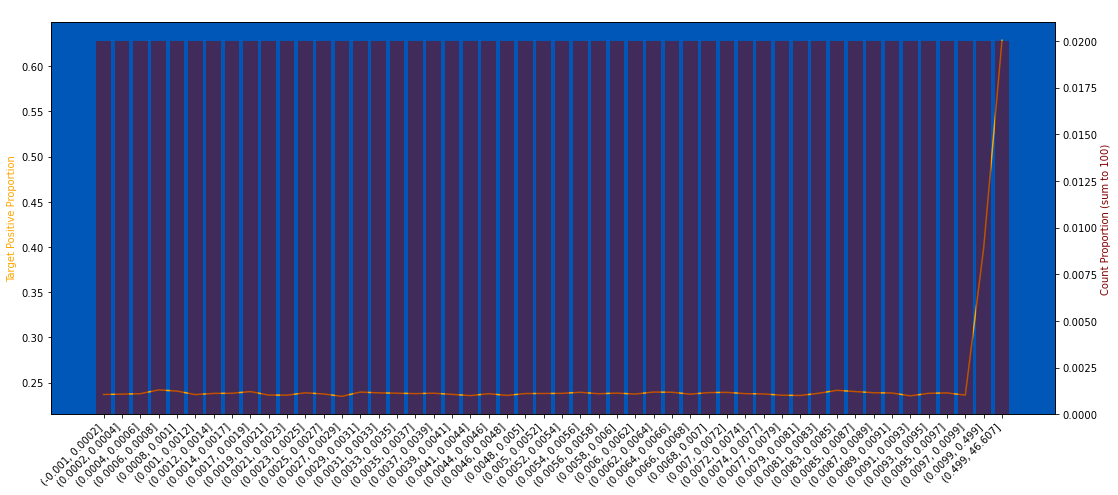

In [94]:
plot_target_check(train, "B_24", q=50, use_raw_bin=True)

In [95]:
train["B_24"] = train["B_24"].round(2)
test["B_24"] = test["B_24"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1


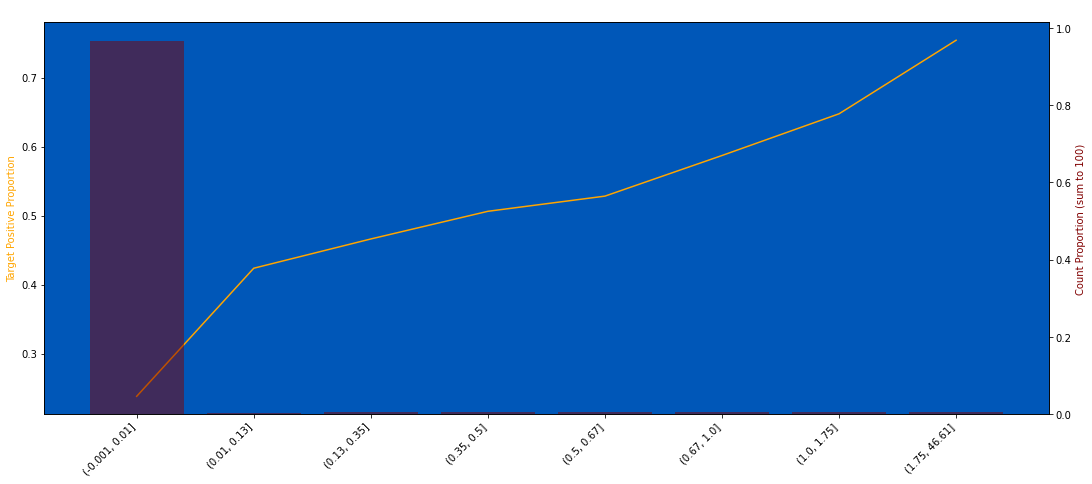

In [96]:
plot_target_check(train, "B_24", q=200, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


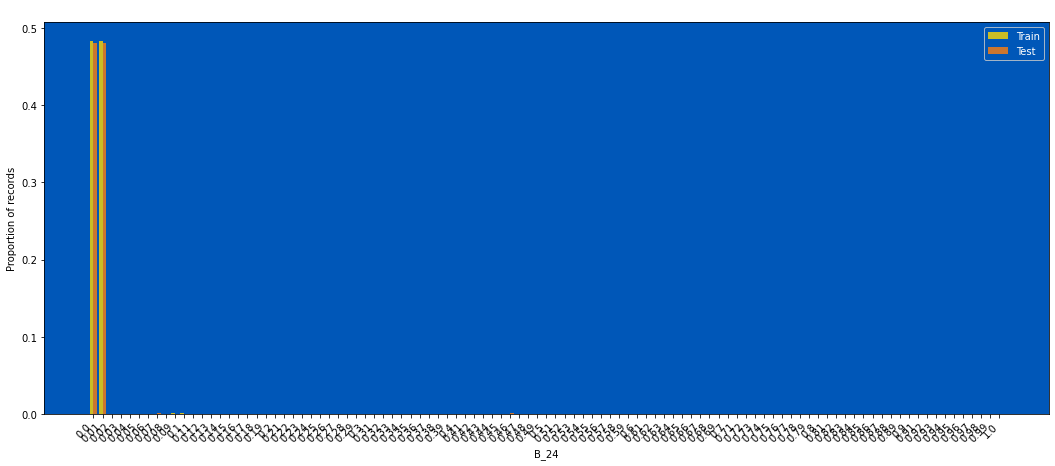

In [97]:
plot_train_test_distribution(train, test, "B_24", nunique_thr=8000)

### B_25

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


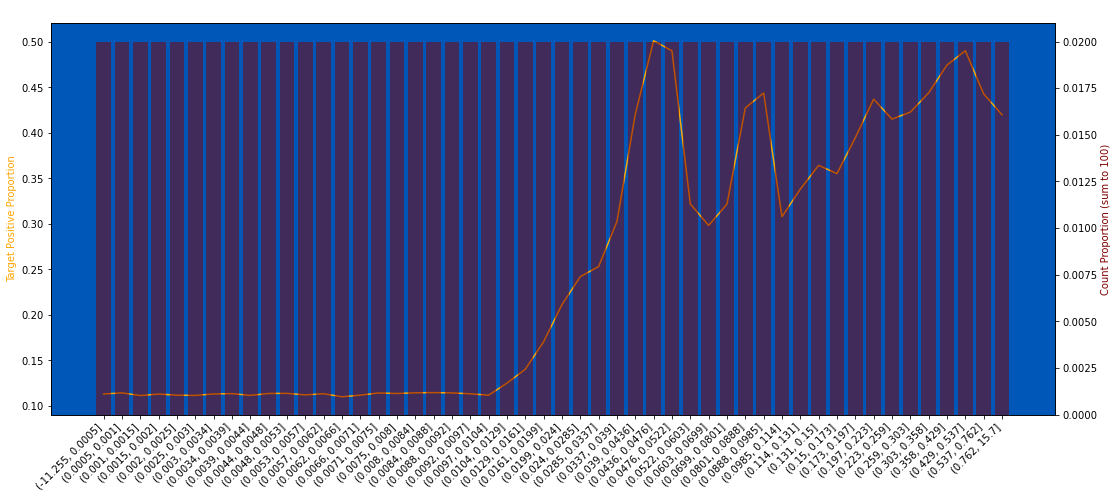

In [98]:
plot_target_check(train, "B_25", q=50, use_raw_bin=True)

In [99]:
train["B_25"] = train["B_25"].round(2)
test["B_25"] = test["B_25"].round(2)

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


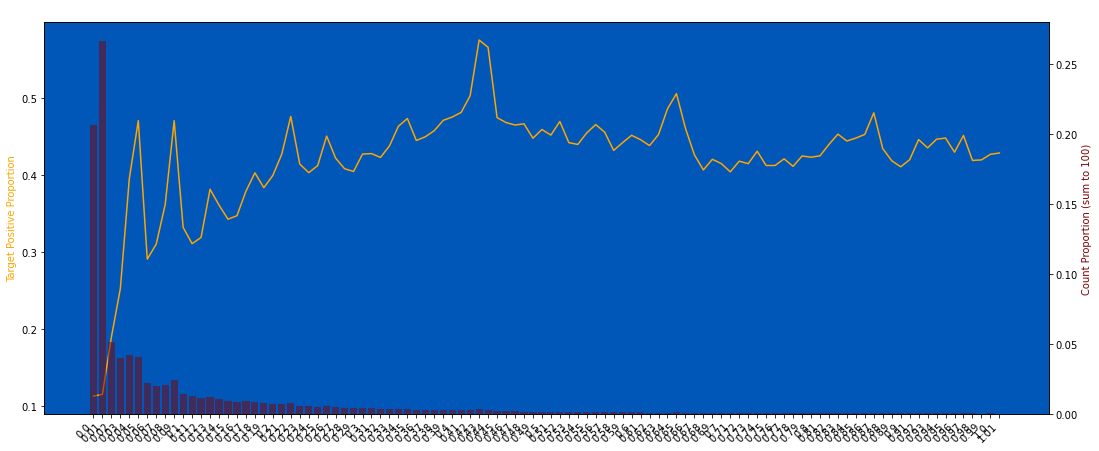

In [100]:
plot_target_check(train, "B_25", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

### B_26

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


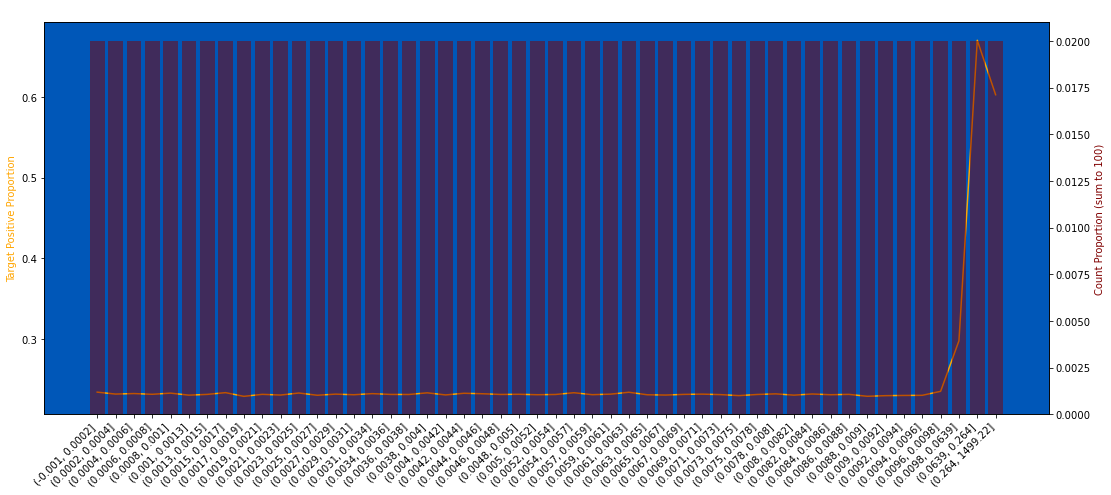

In [101]:
plot_target_check(train, "B_26", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [102]:
train["B_26"] = train["B_26"].round(2)
test["B_26"] = test["B_26"].round(2)

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


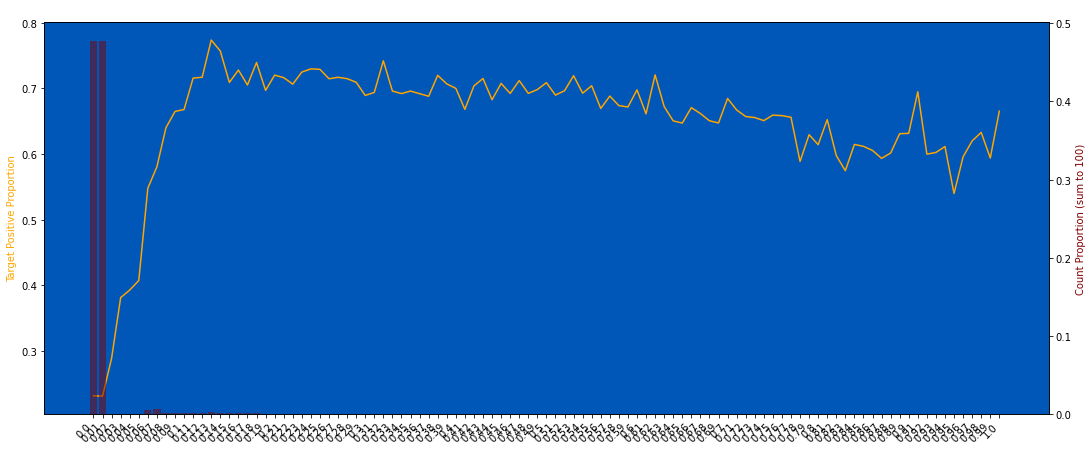

In [103]:
plot_target_check(train, "B_26", q=100, use_raw_bin=True, nunique_thr=35000, strfy_x=True)

### B_27

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


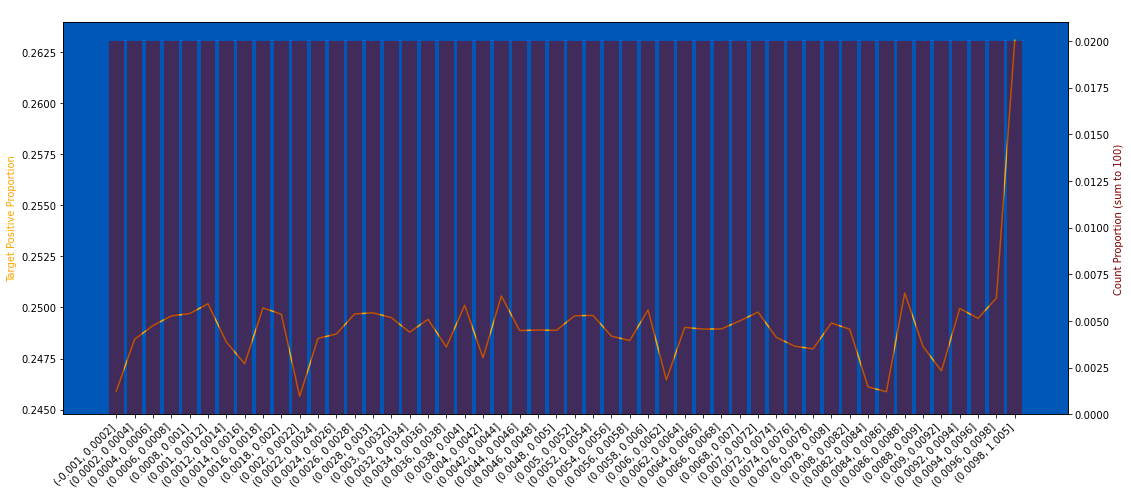

In [104]:
plot_target_check(train, "B_27", q=50, use_raw_bin=True)

In [105]:
train["B_27"] = train["B_27"].round(2)
test["B_27"] = test["B_27"].round(2)

In [106]:
train.loc[train["B_27"].between(-1, 0.01), "B_27"] = 0
test.loc[test["B_27"].between(-1, 0.01), "B_27"] = 0

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


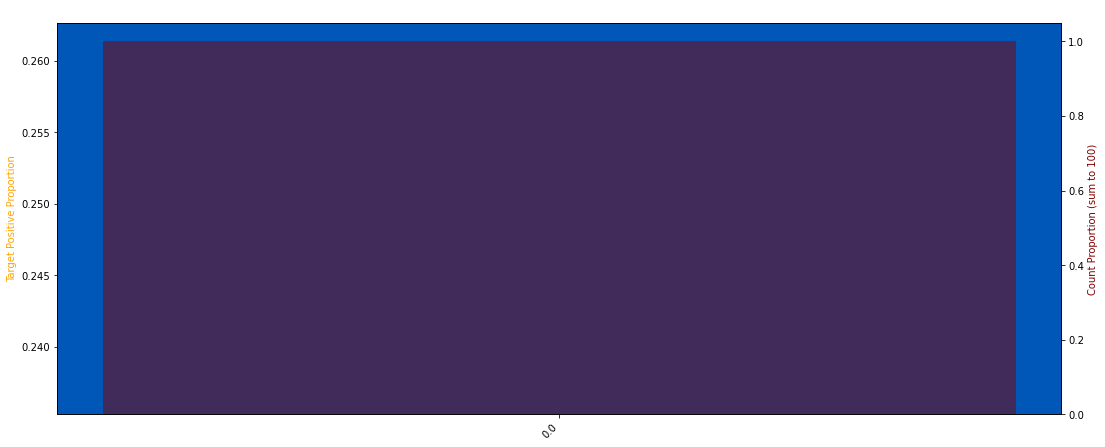

In [107]:
plot_target_check(train, "B_27", q=500, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [108]:
%time
train = train.drop(columns="B_27", errors="ignore")
test = test.drop(columns="B_27", errors="ignore")

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [109]:
gc.collect()

45081

### B_28

0 null count, 0.000 null proportion
nan of the targets have label = 1


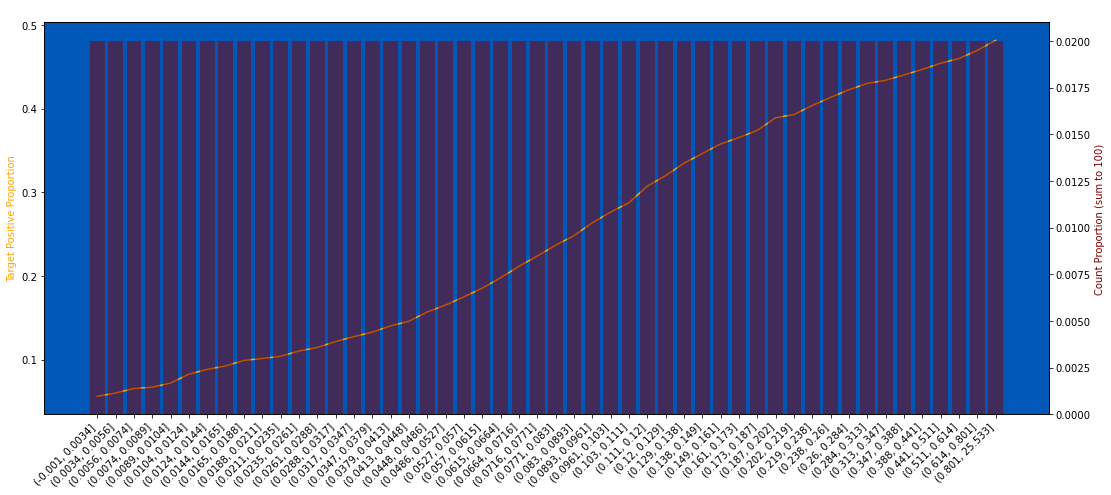

In [110]:
plot_target_check(train, "B_28", q=50, use_raw_bin=True)

In [111]:
train["B_28"] = train["B_28"].round(2)
test["B_28"] = test["B_28"].round(2)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


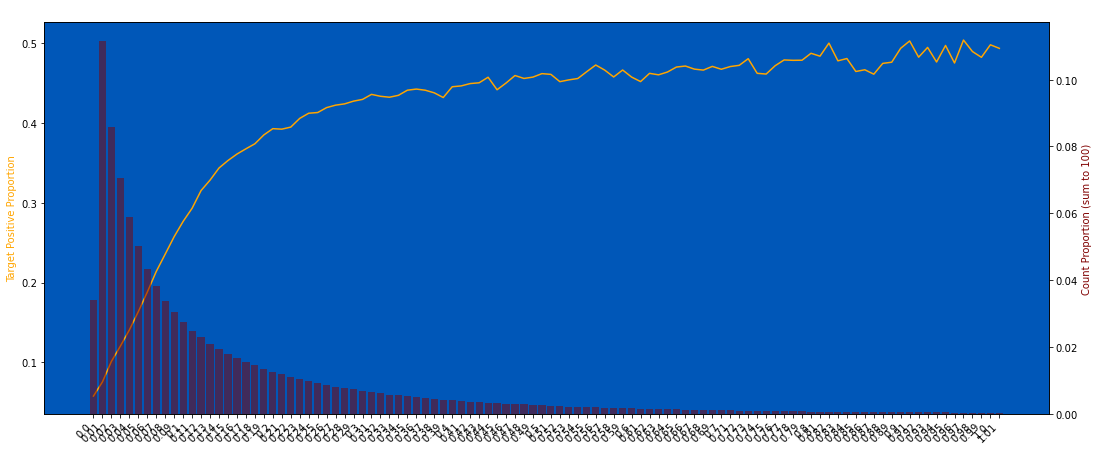

In [112]:
plot_target_check(train, "B_28", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

### B_29

5150035 null count, 0.931 null proportion
0.2512 of the targets have label = 1


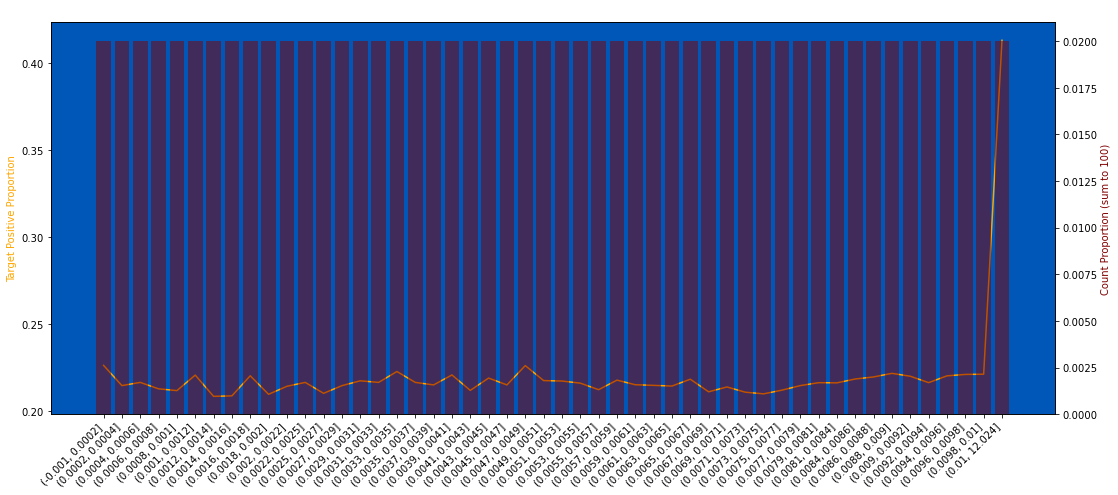

In [113]:
plot_target_check(train, "B_29", q=50, use_raw_bin=True)

In [114]:
train["B_29"] = train["B_29"].round(2)
test["B_29"] = test["B_29"].round(2)

In [115]:
train.loc[train["B_29"].between(-1, 0.01), "B_29"] = np.nan
test.loc[test["B_29"].between(-1, 0.01), "B_29"] = np.nan

5524595 null count, 0.999 null proportion
0.2489 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


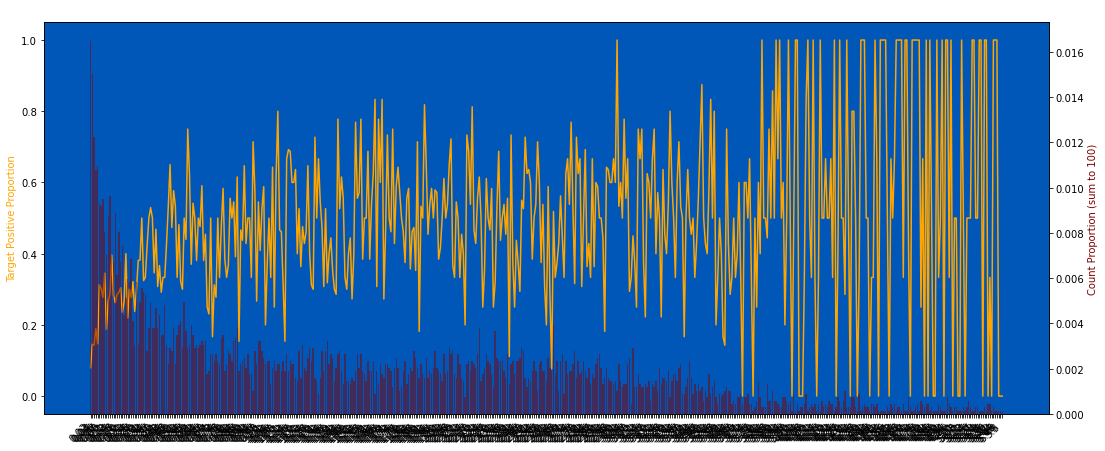

In [116]:
plot_target_check(train, "B_29", q=150, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

### B_30

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


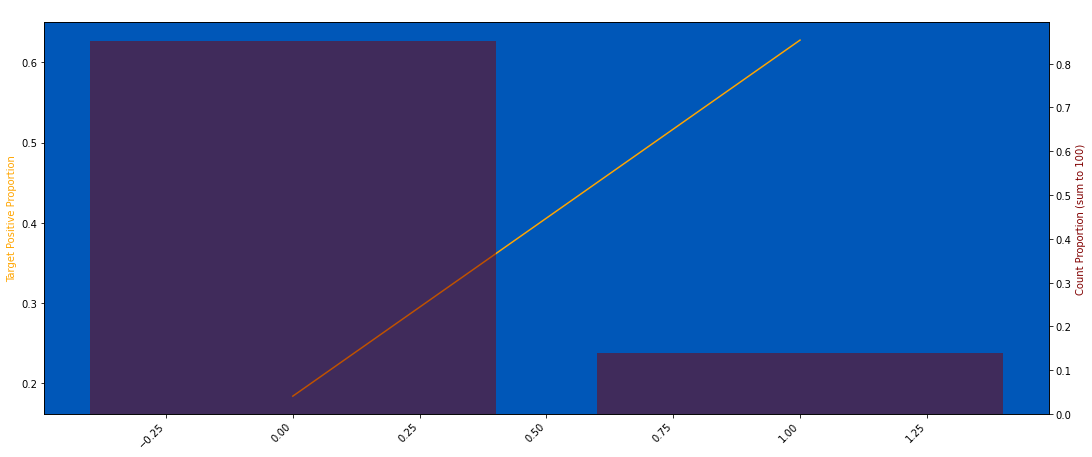

In [117]:
plot_target_check(train, "B_30", q=50, use_raw_bin=True)

### B_31

0 null count, 0.000 null proportion
nan of the targets have label = 1


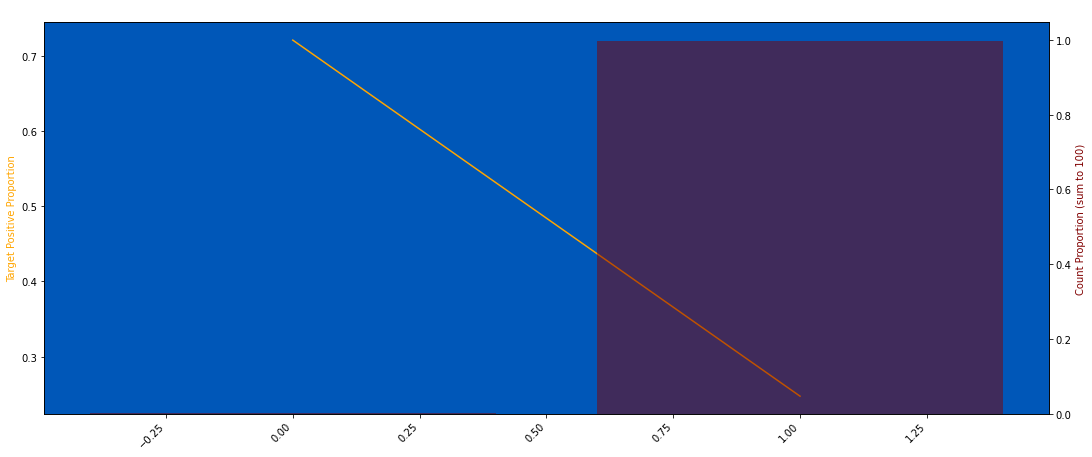

In [118]:
plot_target_check(train, "B_31", q=50, use_raw_bin=True, nunique_thr=3)

### B_32

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


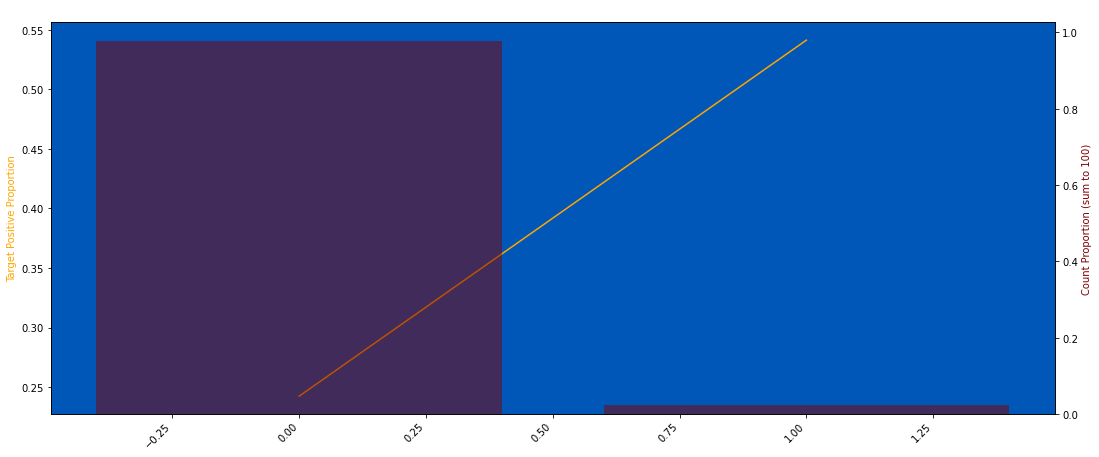

In [119]:
plot_target_check(train, "B_32", q=50, use_raw_bin=True)

### B_33

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


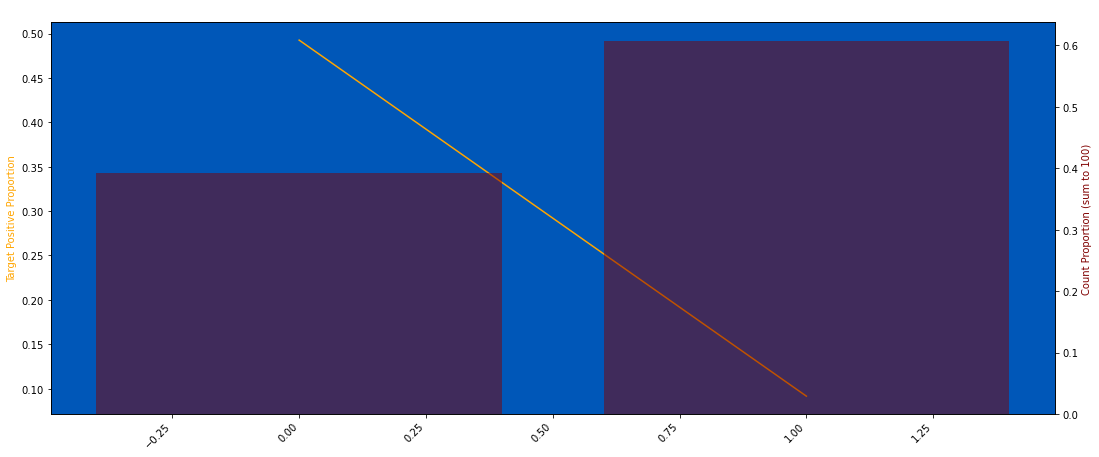

In [120]:
plot_target_check(train, "B_33", q=50, use_raw_bin=True)

### B_36

0 null count, 0.000 null proportion
nan of the targets have label = 1


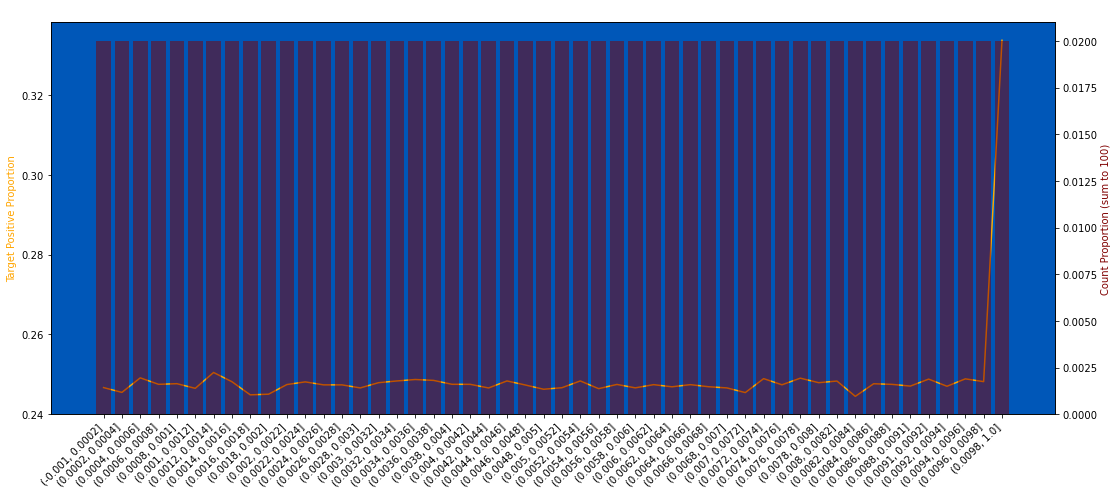

In [121]:
plot_target_check(train, "B_36", q=50, use_raw_bin=True)

In [122]:
train["B_36"] = train["B_36"].round(2)
test["B_36"] = test["B_36"].round(2)

In [123]:
%%time
train.loc[train["B_36"].between(-1, 0.01), "B_36"] = 0
test.loc[test["B_36"].between(-1, 0.01), "B_36"] = 0

CPU times: user 85.6 ms, sys: 90.7 ms, total: 176 ms
Wall time: 96.7 ms


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


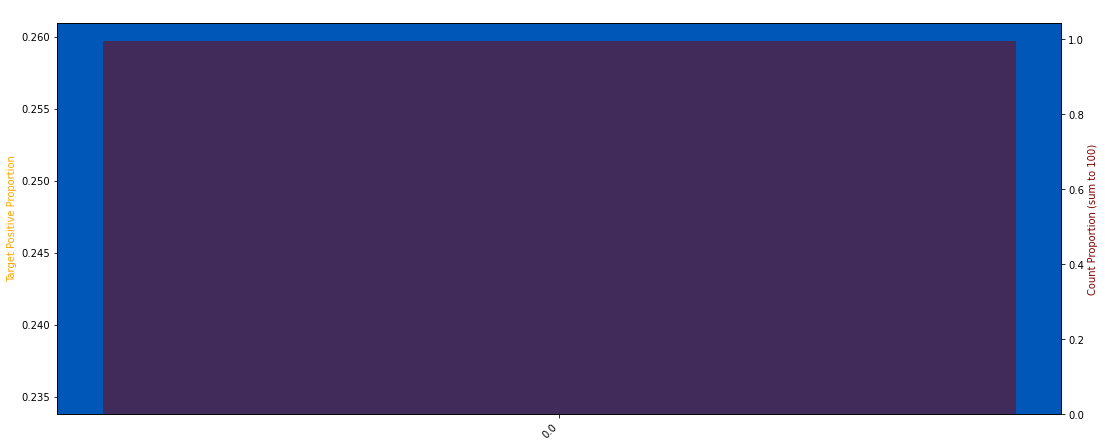

In [124]:
plot_target_check(train, "B_36", q=100, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [125]:
%time
train = train.drop(columns="B_36", errors="ignore")
test = test.drop(columns="B_36", errors="ignore")

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs


In [126]:
gc.collect()

25834

### B_37

56 null count, 0.000 null proportion
0.1964 of the targets have label = 1


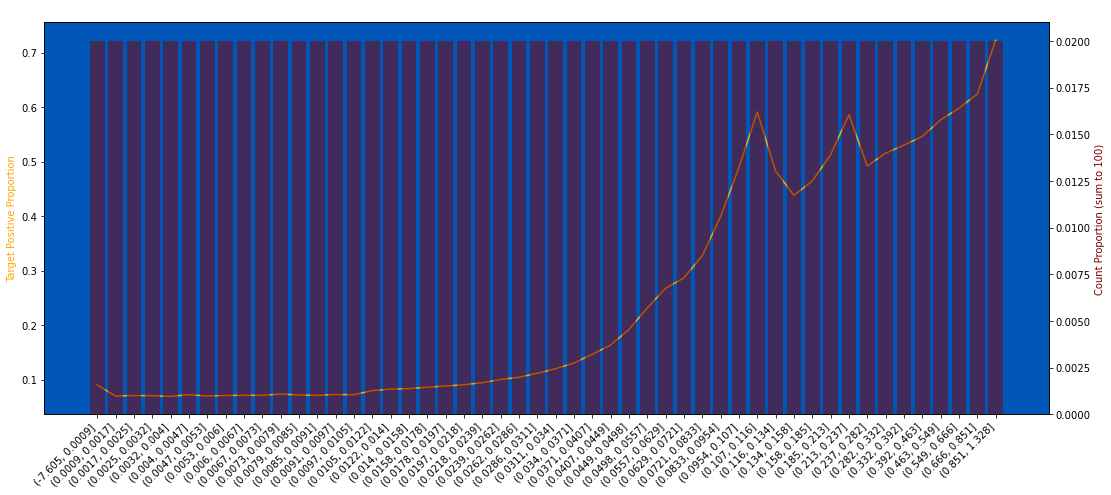

In [127]:
plot_target_check(train, "B_37", q=50, use_raw_bin=True)

In [128]:
train["B_37"] = train["B_37"].round(2)
test["B_37"] = test["B_37"].round(2)

56 null count, 0.000 null proportion
0.1964 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


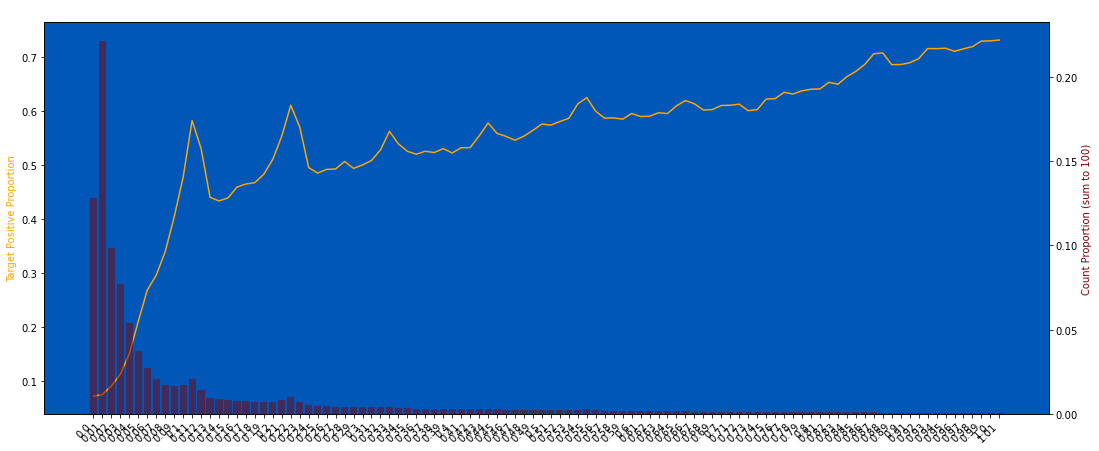

In [129]:
plot_target_check(train, "B_37", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

### B_38

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


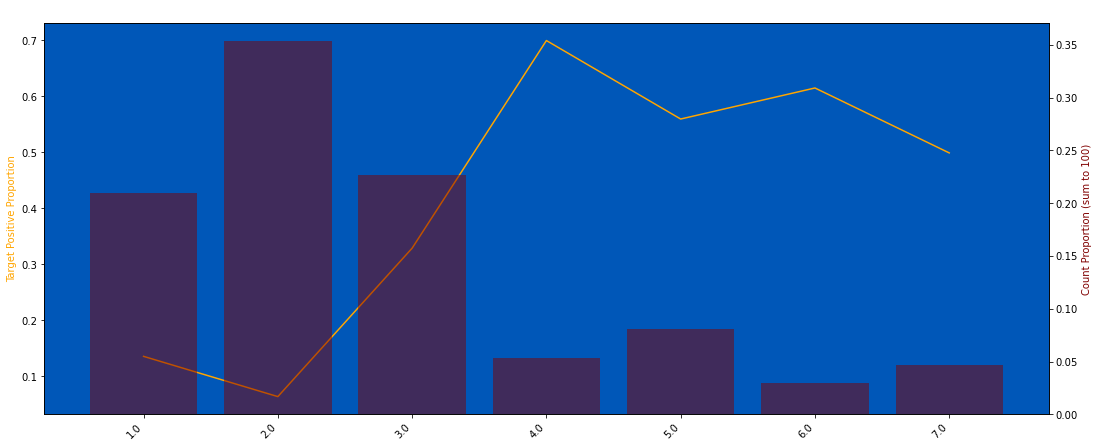

In [130]:
plot_target_check(train, "B_38", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

### B_39

5497819 null count, 0.994 null proportion
0.2473 of the targets have label = 1


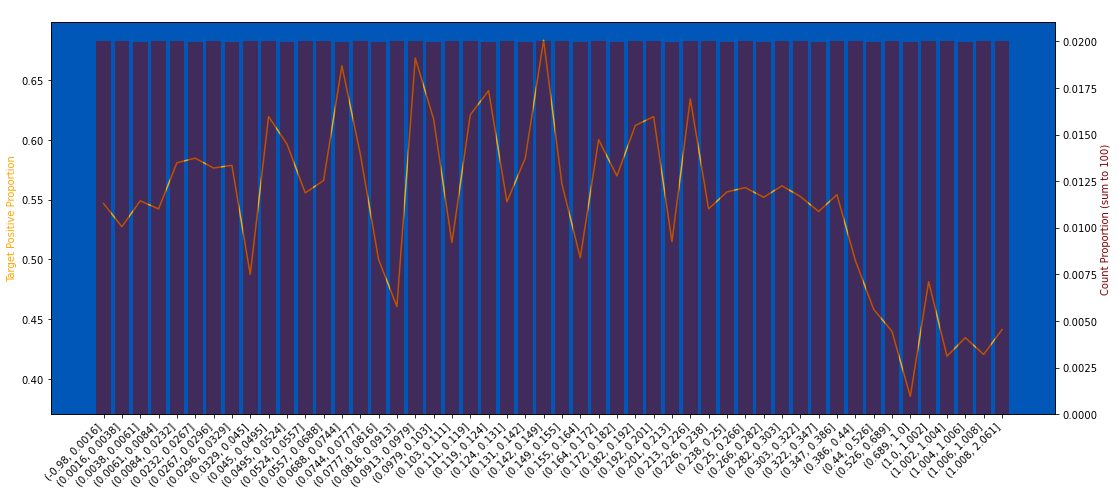

In [131]:
plot_target_check(train, "B_39", q=50, use_raw_bin=True)

In [132]:
train["B_39"] = train["B_39"].round(2)
test["B_39"] = test["B_39"].round(2)

5497819 null count, 0.994 null proportion
0.2473 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


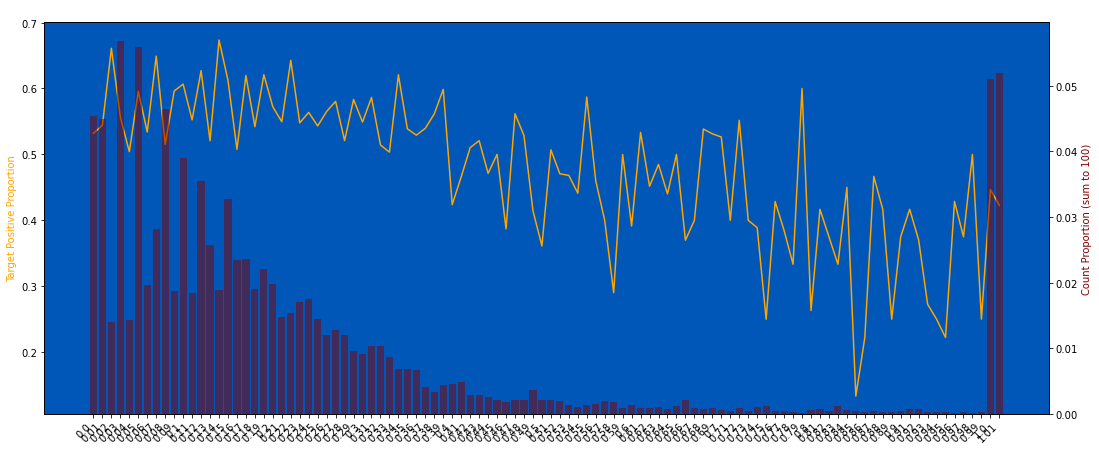

In [133]:
plot_target_check(train, "B_39", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

### B_40

53 null count, 0.000 null proportion
0.1698 of the targets have label = 1


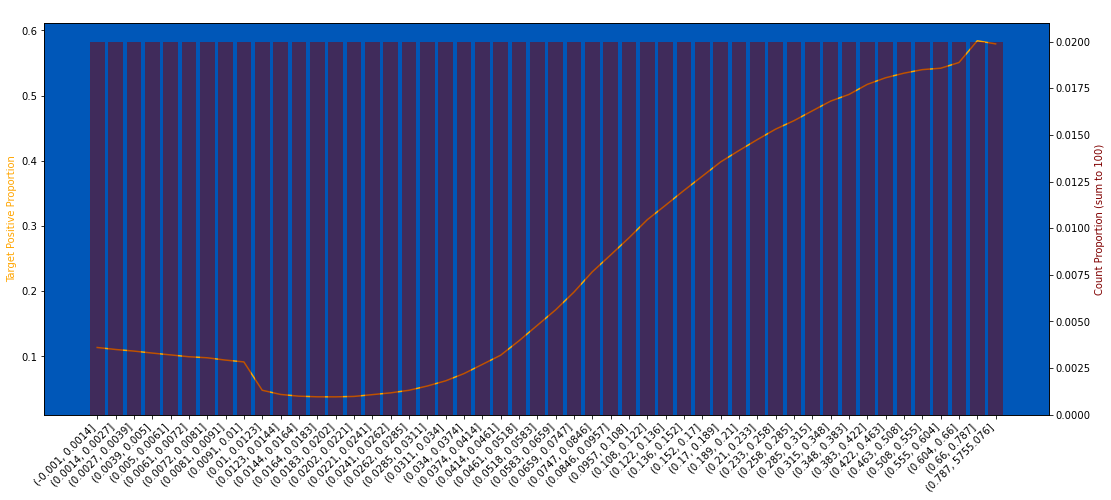

In [134]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True)

In [135]:
train["B_40"] = train["B_40"].round(2)
test["B_40"] = test["B_40"].round(2)

53 null count, 0.000 null proportion
0.1698 of the targets have label = 1


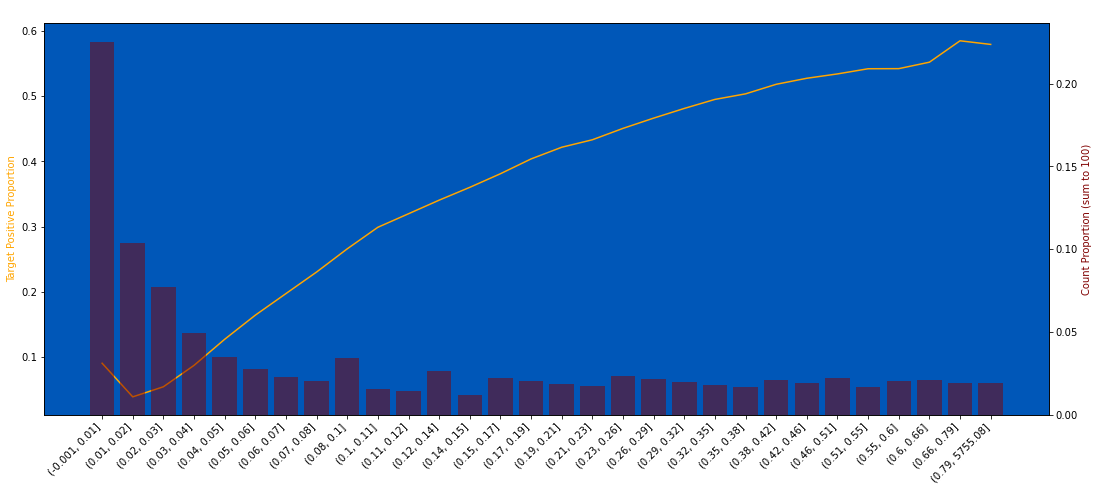

In [136]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True)

In [137]:
%%time
train.loc[train["B_40"].between(-1, 0.02), "B_40"] = np.nan
test.loc[test["B_40"].between(-1, 0.02), "B_40"] = np.nan

CPU times: user 252 ms, sys: 74.7 ms, total: 327 ms
Wall time: 88 ms


1820120 null count, 0.329 null proportion
0.0744 of the targets have label = 1


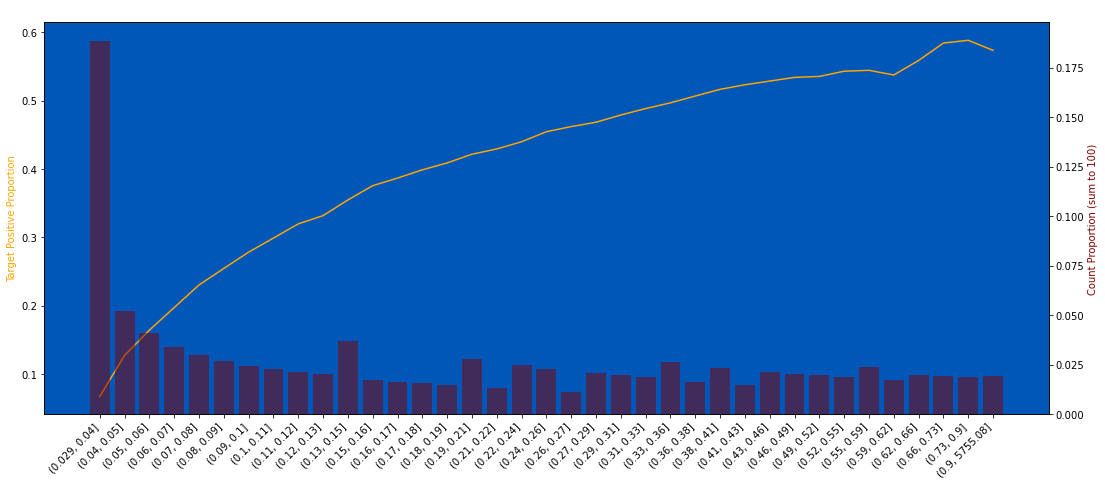

In [138]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True)

### B_41

690 null count, 0.000 null proportion
0.1420 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


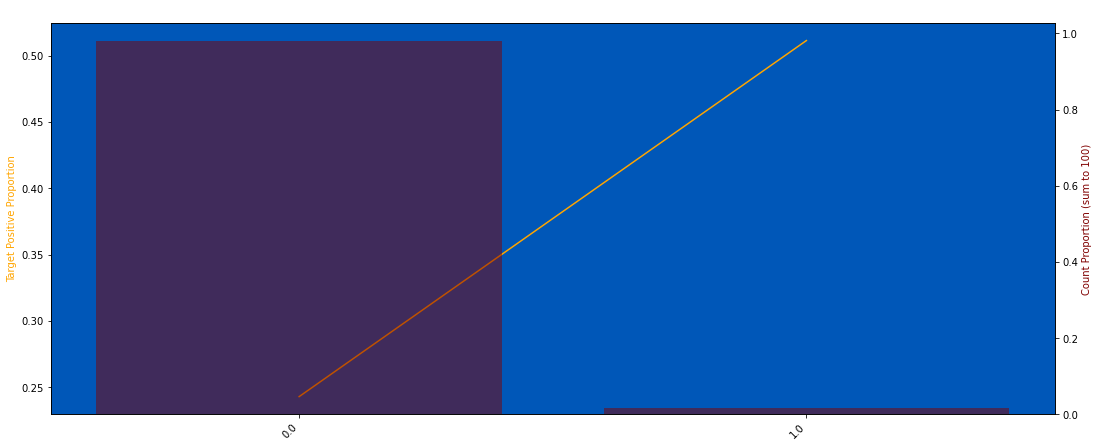

In [139]:
plot_target_check(train, "B_41", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


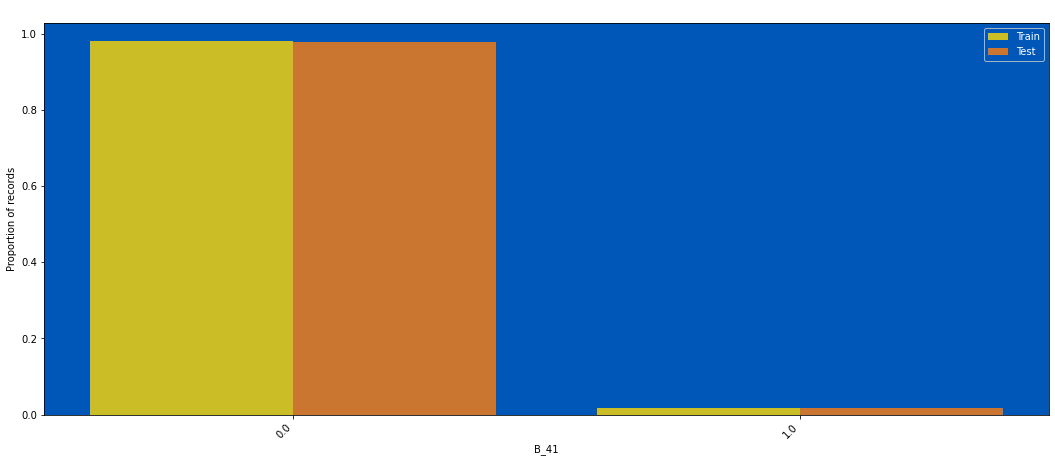

In [140]:
plot_train_test_distribution(train, test, "B_41", nunique_thr=100)

### B_42

5459973 null count, 0.987 null proportion
0.2508 of the targets have label = 1


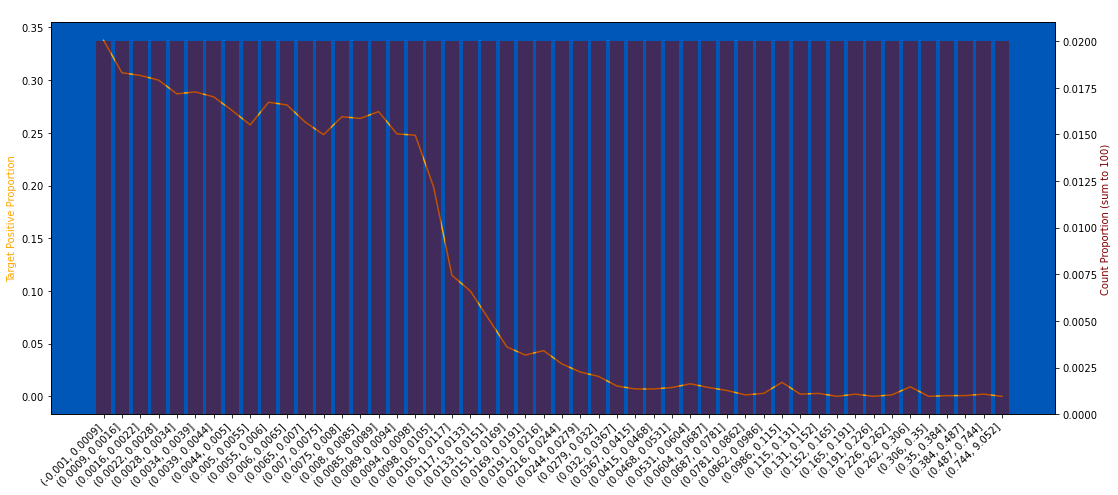

In [141]:
plot_target_check(train, "B_42", q=50, use_raw_bin=True)

In [142]:
train["B_42"] = train["B_42"].round(2)
test["B_42"] = test["B_42"].round(2)

5459973 null count, 0.987 null proportion
0.2508 of the targets have label = 1


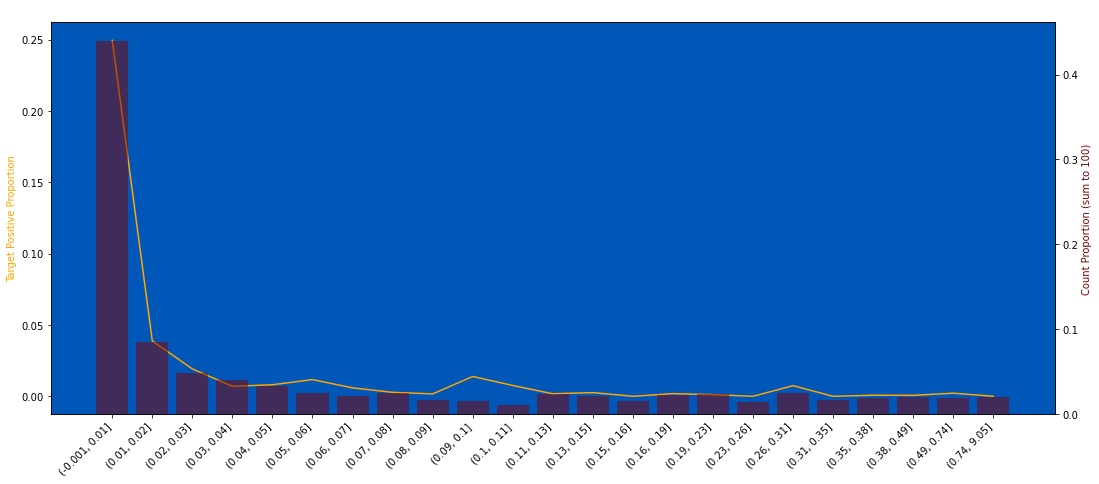

In [143]:
plot_target_check(train, "B_42", q=50, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


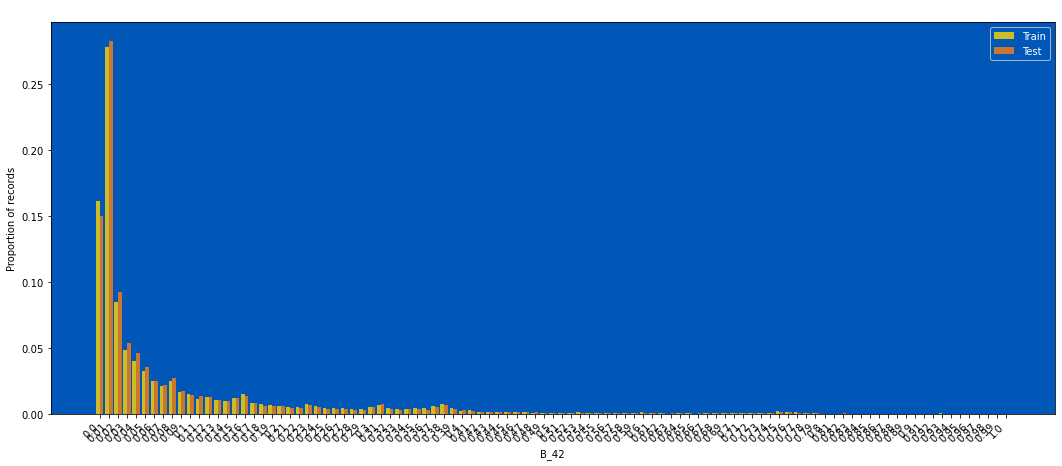

In [144]:
plot_train_test_distribution(train, test, "B_42", nunique_thr=300)

In [146]:
train = train.drop(columns=["temp"], errors="ignore")
test = test.drop(columns=["temp"], errors="ignore")

### Column checking

In [147]:
all_columns = get_cols(train, "B_")

In [148]:
for d in tqdm(all_columns):
    neg1_series = train.loc[train[d] == -1, d]
    if len(neg1_series) > 0:
        print("Train", d, len(neg1_series))
        train[d] = train[d].replace(-1, -999)
    neg1_series = test.loc[test[d] == -1, d]
    if len(neg1_series) > 0:
        print("Test", d, len(neg1_series))
        test[d] = test[d].replace(-1, -999)

 32%|██████████████████████████████████████████                                                                                           | 12/38 [00:00<00:00, 37.15it/s]

Test B_14 2
Test B_15 2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:05<00:00,  7.18it/s]


In [149]:
d_col_nunique = train[all_columns].nunique()

In [150]:
less_unique_d_cols = d_col_nunique[d_col_nunique < 64].index.tolist()

In [151]:
for d in less_unique_d_cols:
    print(d, ":", train[d].dtype, "\n", sorted(train[d].unique().tolist()), "\n")

B_8 : float32 
 [0.0, 1.0, nan] 

B_16 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan] 

B_18 : float32 
 [0.0, 0.009999999776482582, 0.019999999552965164, 0.05000000074505806, 0.05999999865889549, 0.07000000029802322, 0.07999999821186066, 0.09000000357627869, 0.10000000149011612, 0.11999999731779099, 0.12999999523162842, 0.14000000059604645, 0.15000000596046448, 0.1599999964237213, 0.17000000178813934, 0.18000000715255737, 0.1899999976158142, 0.20000000298023224, 0.20999999344348907, 0.2199999988079071, 0.23000000417232513, 0.23999999463558197, 0.25, 0.25999999046325684, 0.27000001072883606, 0.28999999165534973, 0.30000001192092896, 0.3100000023841858, 0.3199999928474426, 0.33000001311302185, 0.3400000035762787, 0.3499999940395355, 0.36000001430511475, 0.3700000047683716, 0.3799999952316284, 0.4000000059604645, 0.4099999964237213, 0.41999998688697815, 0.4300000071525574, 0.4399999976158142, 0.44999998807907104, 0.46000000834465027, 0.4699999988079

In [ ]:
# for d in tqdm(train.columns):
#     train[d] = train[d].fillna(-127)
#     test[d] = test[d].fillna(-127)

In [152]:
cols = ["B_8", "B_16", "B_19", "B_20", "B_22", "B_30", "B_33", "B_38", "B_41"]

In [153]:
for col in tqdm(cols):
    train[col] = integerize(train[col])
    test[col] = integerize(test[col])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:35<00:00,  3.90s/it]


In [154]:
%%time
train = train.drop(columns="temp", errors="ignore")
test = test.drop(columns="temp", errors="ignore")

CPU times: user 1.55 s, sys: 7.83 s, total: 9.38 s
Wall time: 15.5 s


In [155]:
train.shape, test.shape

((5531451, 193), (11363762, 192))

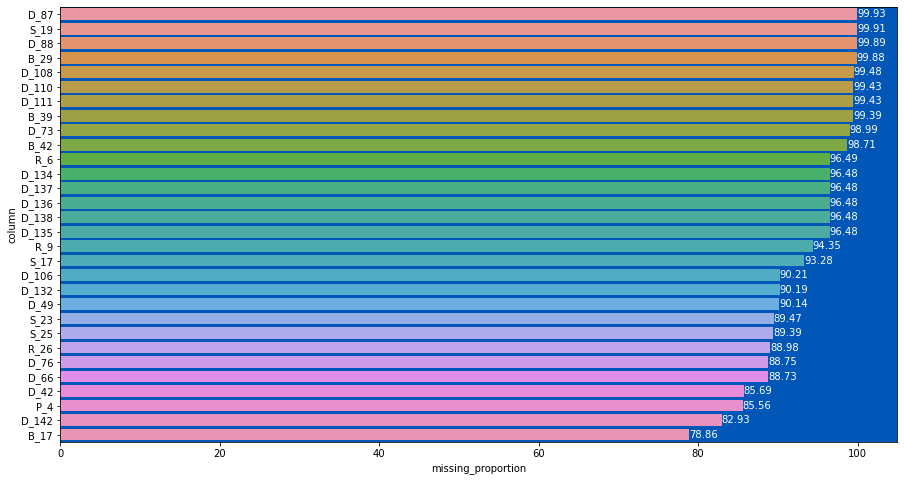

In [156]:
missing_df = plot_missing_proportion_barchart(train)

In [157]:
%%time
train.to_parquet(f"{RAW_TRAIN_PARQUET_PATH}/train_psrb.parquet")
test.to_parquet(f"{RAW_TEST_PARQUET_PATH}/test_psrb.parquet")

CPU times: user 45.9 s, sys: 10.8 s, total: 56.7 s
Wall time: 51.8 s


In [158]:
END = time.time()

In [159]:
print(f"{END - START:.2f} seconds elapsed")

670.55 seconds elapsed
